## Introduction
#### The objective of the project is to predict whether Hotel booking will be cancelled or not

### Attribute Information
1. X_h: Hotel either Resort Hotel or City Hotel
2. Y_c: Dependent Variable indicating if the booking was canceled (1) or not (0)
3. X_lt: Lead Time means number of days between the booking date to the arrival date
4. X_ady: Year of arrival
5. X_adm: Month of arrival
6. X_adw: Week number according to year of arrival
7. X_ad: Day of arrival
8. X_swen: Number of weekend nights booked (Saturday or Sunday)
9. X_swn: Number of week nights booked (Monday to Friday)
10. X_ad: Number of adults
11. X_cd: Number of children
12. X_b: Number of babies
13. X_m: Type of meal booked
14. X_cy: Country of origin
15. X_ms: Market segment designation, typically influences the price sensitivity
16. X_dc: Booking distribution channel, refers to how the booking was made
17. X_rg: Value indication if the booking was from a repeated guest (1) or not (0)
18. X_pc: Number of previous cancellations prior to current booking
19. X_pbnc: Number of previous booking not canceled prior to current booking
20. X_rrt: Code of room type reserved
21. X_art: Code for the type of room assigned to the booking
22. X_cb: Number of changes made to the booking since entering the hotel management system
23. X_dt: Type of deposit made for the reservation
24. X_ag: ID of the travel agency that made the booking
25. X_cpy: ID of the company/organization that made the booking or is responsible for payment
26. X_dwl: Number of days booking was in the waiting list until it was confirmed
27. X_ct: customer type of booking
28. X_adr: Average Daily Rate (the sum of transactions divided by the number of nights stayed)
29. X_rcp: Number of car parking spaces requested
30. X_tsr: Number of special requests made by the customer
31. X_rs: Last reservation status (Canceled, Check-Out, No-Show)
32. X_rsd: Reservation status date at which the last status was set

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#import sidetable as stb
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# machine learning imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn import metrics

### Gathering Data

In [2]:
df = pd.read_csv('C:/Users/manis/Desktop/hotel_booking.csv')
df.head(5)

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_swen,X_swn,X_ad.1,...,X_dt,X_ag,X_cpy,X_dwl,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Checking Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X_h     119390 non-null  object 
 1   Y_c     119390 non-null  int64  
 2   X_lt    119390 non-null  int64  
 3   X_ady   119390 non-null  int64  
 4   X_adm   119390 non-null  object 
 5   X_adw   119390 non-null  int64  
 6   X_ad    119390 non-null  int64  
 7   X_swen  119390 non-null  int64  
 8   X_swn   119390 non-null  int64  
 9   X_ad.1  119390 non-null  int64  
 10  X_cd    119386 non-null  float64
 11  X_b     119390 non-null  int64  
 12  X_m     119390 non-null  object 
 13  X_cy    118902 non-null  object 
 14  X_ms    119390 non-null  object 
 15  X_dc    119390 non-null  object 
 16  X_rg    119390 non-null  int64  
 17  X_pc    119390 non-null  int64  
 18  X_pbnc  119390 non-null  int64  
 19  X_rrt   119390 non-null  object 
 20  X_art   119390 non-null  object 
 21  X_cb    11

### Observations:
##### • The dataframe has a total of 119390 rows and 32 columns.
##### • Dataframe still has null values in children, country, agent, company columns
##### • The classification target seems to be an Y_c column with data type int64.
##### • Columns other than Y_c are features

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y_c,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
X_lt,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
X_ady,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
X_adw,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
X_ad,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
X_swen,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
X_swn,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
X_ad.1,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
X_cd,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
X_b,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Target feature is Y_c
#### Dependent Variable indicating if the booking was canceled (1) or not (0)

In [5]:
# Preparing Table
a = round(df['Y_c'].value_counts()/len(df['Y_c']),2)
survive_ratio=  pd.DataFrame(a).T 
survive_ratio = survive_ratio.rename(columns={0:'Not Canceled' , 1:'Canceled'})
survive_ratio

,Not Canceled,Canceled
Y_c,0.63,0.37


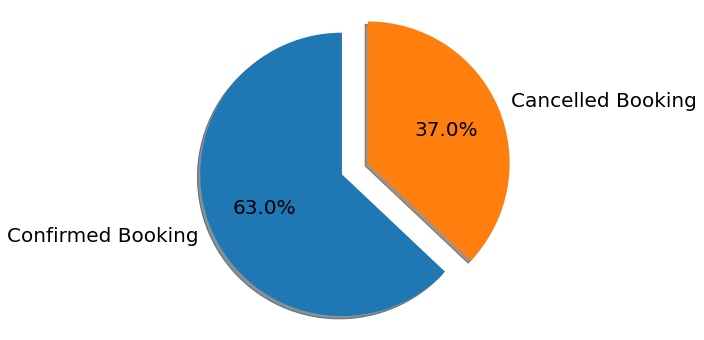

In [6]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df['Y_c'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal') 
plt.show()

### Observation
#### 63% customers has not canceled booking whereas 37% canceled

## Let's look at missing data and Duplicate values

In [7]:
df_clean = df.copy()

In [9]:
df_clean.nunique().sort_values()

X_h          2
Y_c          2
X_rg         2
X_ady        3
X_dt         3
X_rs         3
X_ct         4
X_rcp        5
X_m          5
X_b          5
X_dc         5
X_cd         5
X_tsr        6
X_ms         8
X_rrt       10
X_adm       12
X_art       12
X_ad.1      14
X_pc        15
X_swen      17
X_cb        21
X_ad        31
X_swn       35
X_adw       53
X_pbnc      73
X_dwl      128
X_cy       177
X_ag       333
X_cpy      352
X_lt       479
X_rsd      926
X_adr     8879
dtype: int64

In [10]:
perc_missing_data = pd.DataFrame([df_clean.isnull().sum(),df.isnull().sum()*100.0/df_clean.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
X_h,0.0,0.000000
Y_c,0.0,0.000000
X_lt,0.0,0.000000
X_ady,0.0,0.000000
X_adm,0.0,0.000000
X_adw,0.0,0.000000
X_ad,0.0,0.000000
X_swen,0.0,0.000000
X_swn,0.0,0.000000
X_ad.1,0.0,0.000000


In [11]:
missing_values = df_clean.isna().sum()
missing_values = missing_values[missing_values != 0]
missing_values

X_cd          4
X_cy        488
X_ag      16340
X_cpy    112593
dtype: int64

#### 0.003% of rows have missing information for children. Let's look at distribution of children to fill missing information

In [12]:
# Remove rows that have no children data
df_clean.dropna(subset=['X_cd'], inplace=True)

#### Most bookings had no children and hence we will drop the missing rows for children

#### 0.4% of rows have missing information for country.

In [13]:
perc_country_data = pd.DataFrame([df_clean['X_cy'].value_counts(),df_clean['X_cy'].value_counts()*100/df_clean.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48586.0,40.696564
GBR,12129.0,10.159483
FRA,10415.0,8.723803
ESP,8568.0,7.176721
DEU,7287.0,6.103731
...,...,...
DJI,1.0,0.000838
BWA,1.0,0.000838
HND,1.0,0.000838
VGB,1.0,0.000838


#### 40.7% of bookings are from Portugal. Only 0.4% is missing information. We will fill the missing rows of country as mode value since the distribution will not change by much.

In [14]:
df_clean['X_cy'].fillna('PRT',inplace=True)

#### 13% of agent ID and 94% of company ID is missing. It is possible to fill these missing values based on other features.

In [15]:
# Change value company to 0 and 1
df_clean['X_cpy'] = df_clean['X_cpy'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['X_cpy'].value_counts()

0    112589
1      6797
Name: X_cpy, dtype: int64

In [16]:
# Change value agent to 0 and 1
df_clean['X_ag'] = df_clean['X_ag'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['X_ag'].value_counts()

1    103048
0     16338
Name: X_ag, dtype: int64

#### Let's confirm all missing data have been handled

In [17]:
perc_missing_data = pd.DataFrame([df_clean.isnull().sum(),df_clean.isnull().sum()*100.0/df_clean.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
X_h,0.0,0.0
Y_c,0.0,0.0
X_lt,0.0,0.0
X_ady,0.0,0.0
X_adm,0.0,0.0
X_adw,0.0,0.0
X_ad,0.0,0.0
X_swen,0.0,0.0
X_swn,0.0,0.0
X_ad.1,0.0,0.0


### Handle Incorrect Value
#### X_adr

In [18]:
df_clean['X_adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: X_adr, dtype: float64

In [19]:
df_clean[df_clean.X_adr < 0]

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_swen,X_swn,X_ad.1,...,X_dt,X_ag,X_cpy,X_dwl,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,1,0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [20]:
df_clean.drop(df_clean[df_clean['X_adr'] < 0].index, inplace = True)

In [21]:
df_clean['X_adr'].describe()

count    119385.000000
mean        101.834447
std          50.533905
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: X_adr, dtype: float64

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119385 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X_h     119385 non-null  object 
 1   Y_c     119385 non-null  int64  
 2   X_lt    119385 non-null  int64  
 3   X_ady   119385 non-null  int64  
 4   X_adm   119385 non-null  object 
 5   X_adw   119385 non-null  int64  
 6   X_ad    119385 non-null  int64  
 7   X_swen  119385 non-null  int64  
 8   X_swn   119385 non-null  int64  
 9   X_ad.1  119385 non-null  int64  
 10  X_cd    119385 non-null  float64
 11  X_b     119385 non-null  int64  
 12  X_m     119385 non-null  object 
 13  X_cy    119385 non-null  object 
 14  X_ms    119385 non-null  object 
 15  X_dc    119385 non-null  object 
 16  X_rg    119385 non-null  int64  
 17  X_pc    119385 non-null  int64  
 18  X_pbnc  119385 non-null  int64  
 19  X_rrt   119385 non-null  object 
 20  X_art   119385 non-null  object 
 21  X_cb    11

### From the data type information:

#### 1. For column X_cd because it is the number of children data, the appropriate data type should be int64 not float64
#### 2. For X_ag and X_cpy columns are ID data. Ideally for ID, the data type can be either int64 or object. But in this case, it is more suitable to use the int64 . data type
#### 3. For column X_rsd (reservation status date) it should have data type datetime

### Adjust Data Type

In [23]:
# Changing children to integer type: 
df_clean['X_cd'] = df_clean['X_cd'].astype(int)

# Changing reservation status date to datetime type: 
df_clean['X_rsd'] = pd.to_datetime(df['X_rsd'])

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119385 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   X_h     119385 non-null  object        
 1   Y_c     119385 non-null  int64         
 2   X_lt    119385 non-null  int64         
 3   X_ady   119385 non-null  int64         
 4   X_adm   119385 non-null  object        
 5   X_adw   119385 non-null  int64         
 6   X_ad    119385 non-null  int64         
 7   X_swen  119385 non-null  int64         
 8   X_swn   119385 non-null  int64         
 9   X_ad.1  119385 non-null  int64         
 10  X_cd    119385 non-null  int32         
 11  X_b     119385 non-null  int64         
 12  X_m     119385 non-null  object        
 13  X_cy    119385 non-null  object        
 14  X_ms    119385 non-null  object        
 15  X_dc    119385 non-null  object        
 16  X_rg    119385 non-null  int64         
 17  X_pc    119385 non-null  int6

### Feature Engineering
### Total Stays

#### From the X_swen (stays in weekend nights) and X_swn (stays in week nights) columns, we can get the total number of days of stay

In [25]:
df_clean['X_ts'] = df_clean['X_swen'] + df_clean['X_swn']
df_clean.head()

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_swen,X_swn,X_ad.1,...,X_ag,X_cpy,X_dwl,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd,X_ts
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


### Total Guests
#### From the X_ad (adults), X_cd (children) and X_b (babies) columns, we can get information on the total number of people staying overnight

In [26]:
df_clean['X_tg'] = df_clean['X_ad'] + df_clean['X_cd'] + df_clean['X_b']
df_clean.head()

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_swen,X_swn,X_ad.1,...,X_cpy,X_dwl,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd,X_ts,X_tg
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,1


### Kids
#### From most booking sites, usually there are only guest and child categories (under 17 years old), so we can combine the values of X_cd (children) and X _b (babies) into the X_k (kids) column

In [27]:
df_clean['X_k'] = df_clean['X_cd'] + df_clean['X_b']
df_clean.head()

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_swen,X_swn,X_ad.1,...,X_dwl,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd,X_ts,X_tg,X_k
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,1,0


### Guest Location
#### The number of country values is very large in this dataset, we will condense the values to Local or International

In [28]:
df_clean['X_gl'] = df_clean['X_cy'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['X_gl'].value_counts()

International    70311
Local            49074
Name: X_gl, dtype: int64

### Remove Redundant Column

In [29]:
# Delete 'stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies' attributes
df_clean.drop(['X_swen', 'X_swn', 'X_cd', 'X_b'], axis = 1, inplace=True)

### Observation
#### The stays_in_weekend_nights and stays_in_week_nights columns are removed because there is already a total_stays column
#### The children and babies columns were removed because there was already a kids column

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119385 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   X_h     119385 non-null  object        
 1   Y_c     119385 non-null  int64         
 2   X_lt    119385 non-null  int64         
 3   X_ady   119385 non-null  int64         
 4   X_adm   119385 non-null  object        
 5   X_adw   119385 non-null  int64         
 6   X_ad    119385 non-null  int64         
 7   X_ad.1  119385 non-null  int64         
 8   X_m     119385 non-null  object        
 9   X_cy    119385 non-null  object        
 10  X_ms    119385 non-null  object        
 11  X_dc    119385 non-null  object        
 12  X_rg    119385 non-null  int64         
 13  X_pc    119385 non-null  int64         
 14  X_pbnc  119385 non-null  int64         
 15  X_rrt   119385 non-null  object        
 16  X_art   119385 non-null  object        
 17  X_cb    119385 non-null  int6

In [31]:
# Select columns based on data types
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

# Remove target variable from numerical columns
num_cols = num_cols.drop('Y_c')

# Print the list of numerical and categorical columns
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['X_lt', 'X_ady', 'X_adw', 'X_ad', 'X_ad.1', 'X_rg', 'X_pc', 'X_pbnc',
       'X_cb', 'X_ag', 'X_cpy', 'X_dwl', 'X_adr', 'X_rcp', 'X_tsr', 'X_ts',
       'X_tg', 'X_k'],
      dtype='object')
Categorical Columns: Index(['X_h', 'X_adm', 'X_m', 'X_cy', 'X_ms', 'X_dc', 'X_rrt', 'X_art', 'X_dt',
       'X_ct', 'X_rs', 'X_gl'],
      dtype='object')


In [32]:
df_clean.shape

(119385, 32)

## Exploratory Data Analysis 
### Univariate Analysis
### Numerical Attrbutes 
#### Distribution plots

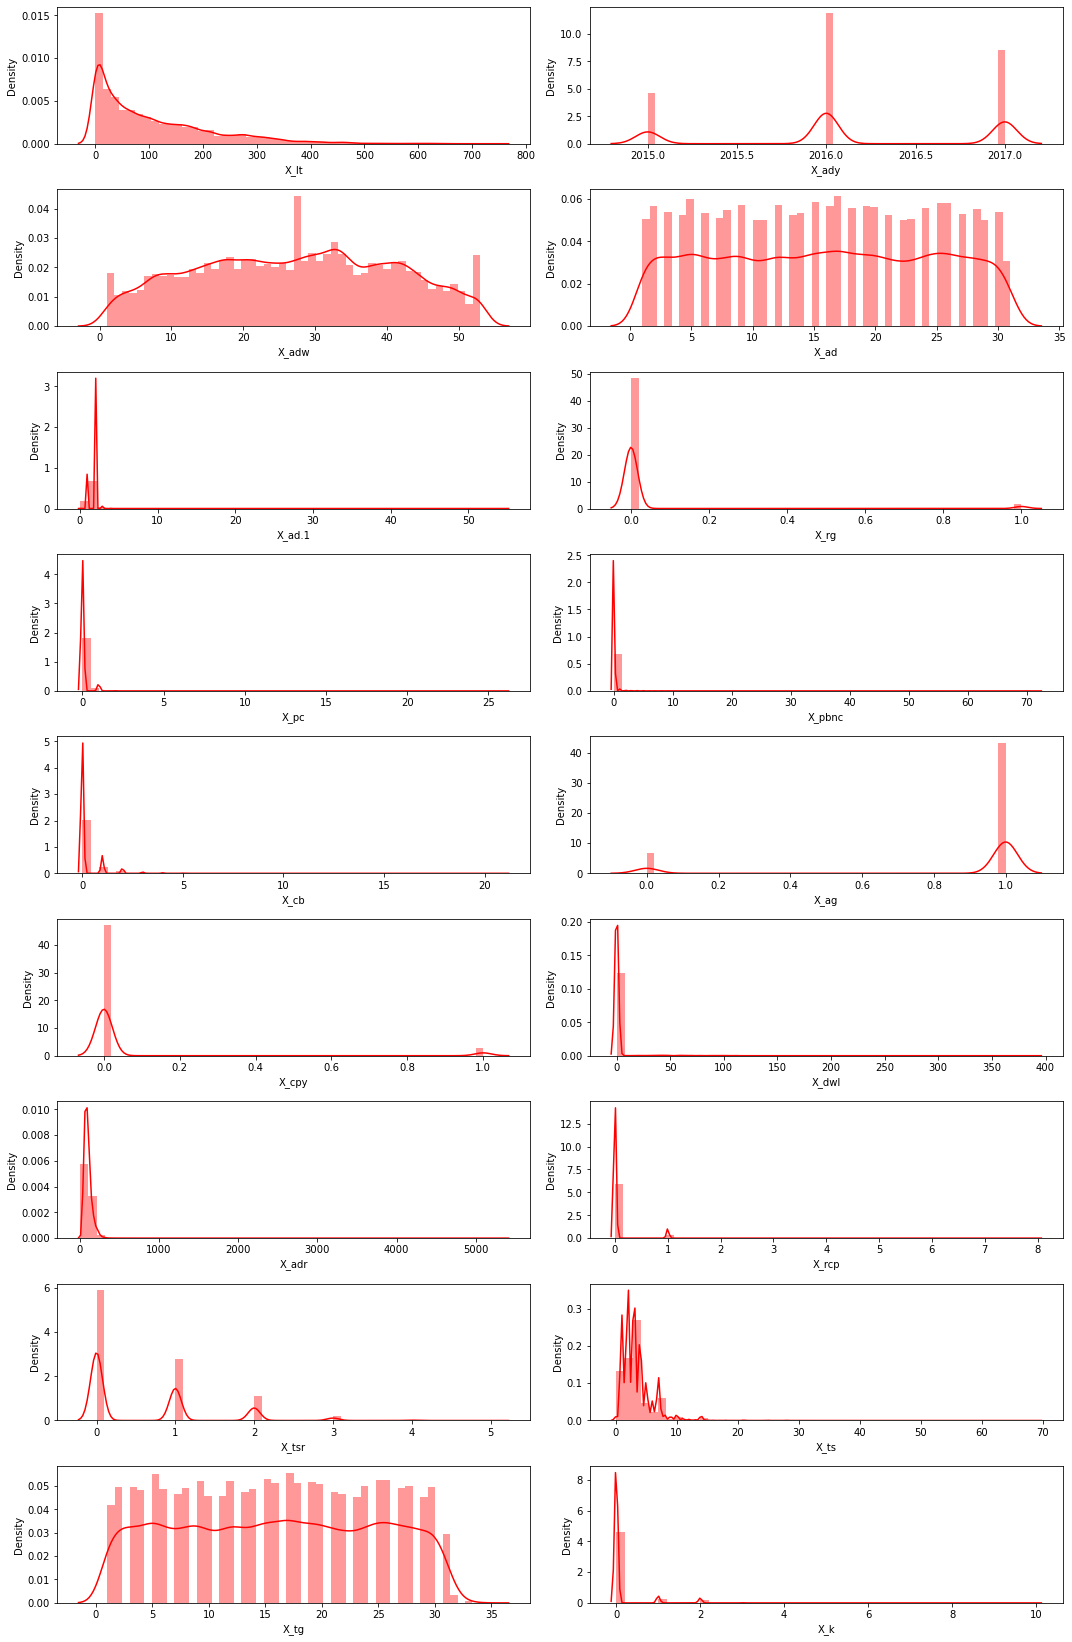

In [33]:
plt.figure(figsize=(15, 25))
for i in range(0, len(num_cols)):
    plt.subplot(10, int(len(num_cols)/9), i+1)
    sns.distplot(df_clean[num_cols[i]], color='red')
    plt.tight_layout()

KeyError: 'X_ts'

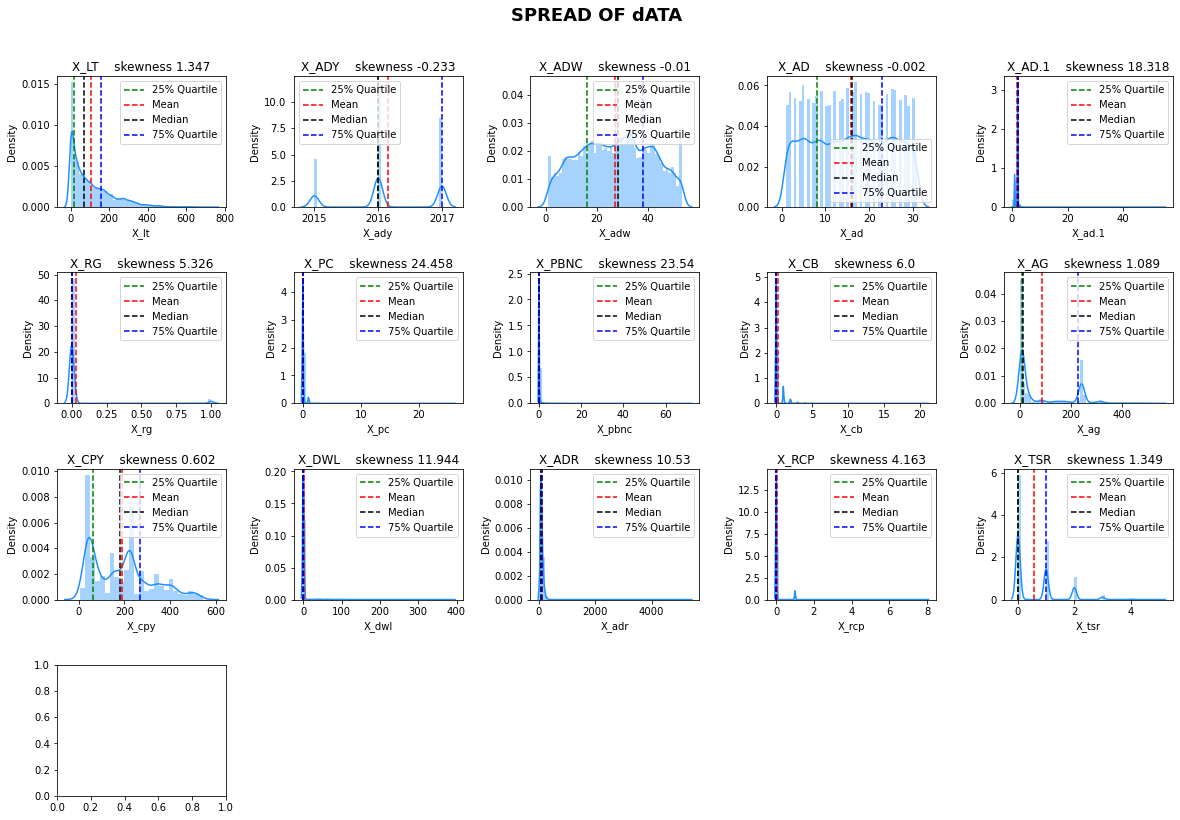

In [34]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[20,16])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_cols):
    ax0 = fig.add_subplot(5, 5, i+1) 
    ax0 = sns.distplot(df[col],  color='dodgerblue')
    ax0.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax0.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax0.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax0.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax0.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax0.set_xlabel(f'{col}')
    ax0.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    ax0.legend(fontsize=10)

### Observation
###### Skewness is a statistical measure that describes the degree of asymmetry in a distribution. It is a measure of the deviation of a distribution from symmetry around its mean. A symmetric distribution has a skewness of zero. Skewness can help to understand the shape of a distribution, which can provide insights into the underlying processes that generate the data.
#### X_b: Number of babies feature has most asymmetry distribution with skewnwss of 24.647.
#### X_ld: Lead Time feature found to be most symmetric in nature with skewnwss of 1.347.

### Cancellations According to Lead Time

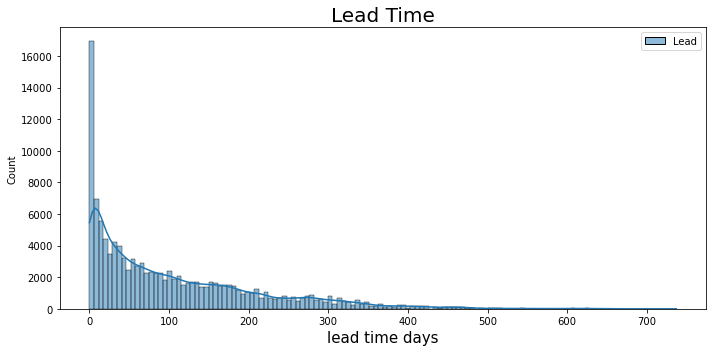

In [35]:
# hist plot of lead time
plt.figure(figsize=(10,5))
lead_time = df_clean['X_lt']
lead_time = pd.DataFrame(sorted(lead_time, reverse = True), columns = ['Lead'])
sns.histplot(lead_time, kde=True)
plt.title("Lead Time", size=20)
plt.xlabel("lead time days", size=15)
plt.tight_layout()
plt.show()
# kde = kernel density estimation (displays distribution function, density curve)
# shows the distribution and highest concentration points

In [36]:
# divides lead time by less than 100 days, 100-355 days and 365 or more days
lead_time_1 = df_clean[df_clean["X_lt"] < 100]
lead_time_2 = df_clean[(df_clean["X_lt"] >= 100) & (df["X_lt"] < 365)]
lead_time_3 = df_clean[df_clean["X_lt"] >= 365]

In [37]:
# calculates cancellations according to lead time groups
lead_cancel_1 = lead_time_1["Y_c"].value_counts()
lead_cancel_2 = lead_time_2["Y_c"].value_counts()
lead_cancel_3 = lead_time_3["Y_c"].value_counts()

In [38]:
# total count of lead time according to cancellation
total_lead_days_cancel = pd.DataFrame(data=[lead_cancel_1,lead_cancel_2,lead_cancel_3],
             index=["[0,100] days", "[100,365] days", "[365,max] days"])
total_lead_days_cancel

,0,1
"[0,100] days",51835,19844
"[100,365] days",22301,22192
"[365,max] days",1029,2184


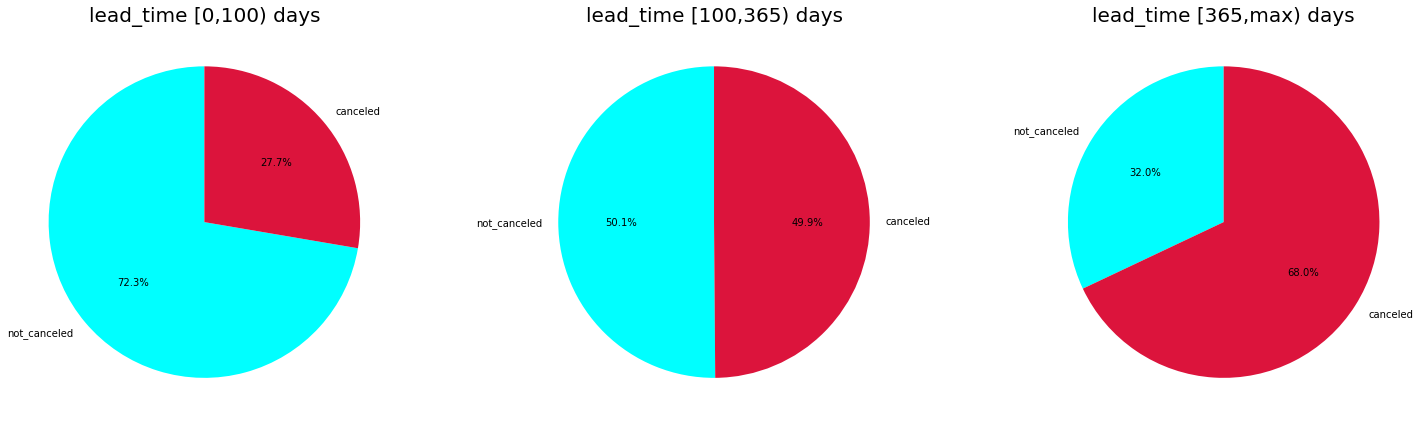

In [39]:
# pie plot for each lead time group
fig, ax = plt.subplots(1,3, figsize=(21,6))
ax[0].pie(np.array([total_lead_days_cancel[0][0], total_lead_days_cancel[1][0]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['aqua', 'crimson'])
ax[0].set_title("lead_time [0,100) days", size=20)
ax[1].pie(np.array([total_lead_days_cancel[0][1], total_lead_days_cancel[1][1]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['aqua', 'crimson'])
ax[1].set_title("lead_time [100,365) days", size=20)
ax[2].pie(np.array([total_lead_days_cancel[0][2], total_lead_days_cancel[1][2]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['aqua', 'crimson'])
ax[2].set_title("lead_time [365,max) days", size=20)
plt.tight_layout()
plt.show()

### Observations:
1. Most bookings occur about 5 days prior to arrival.
2. When the lead time is larger the chances for cancellation increase.

### Categorical Features

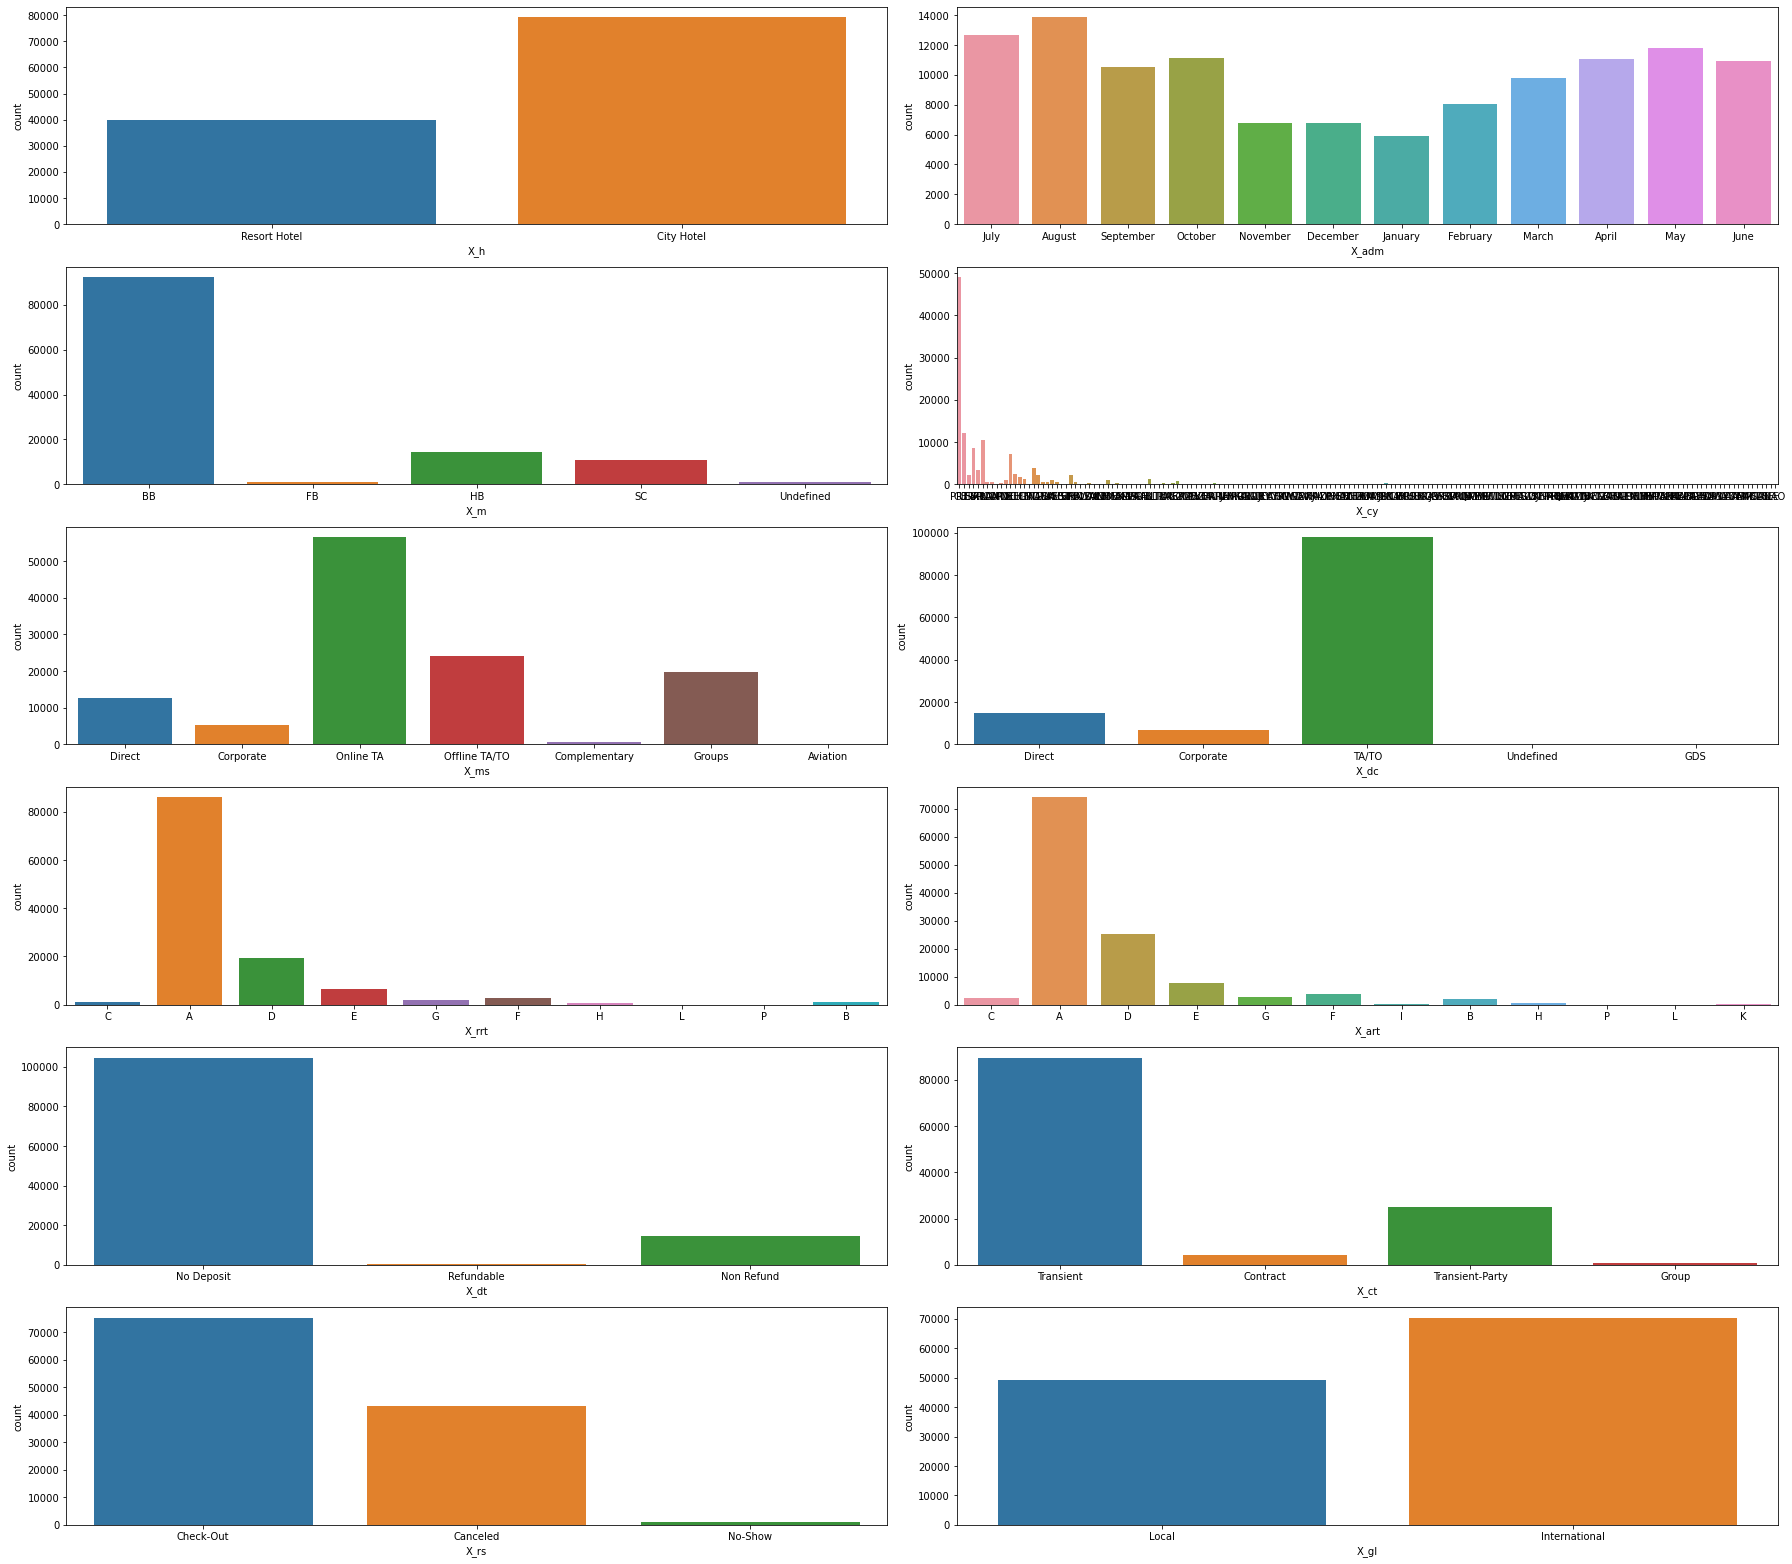

In [40]:
plt.figure(figsize=(25, 25))
for i in range(0, len(cat_cols)):
    plt.subplot(7, len(cat_cols)/6, i+1)
    sns.countplot(df_clean[cat_cols[i]])
    plt.tight_layout()

KeyError: 'X_gl'

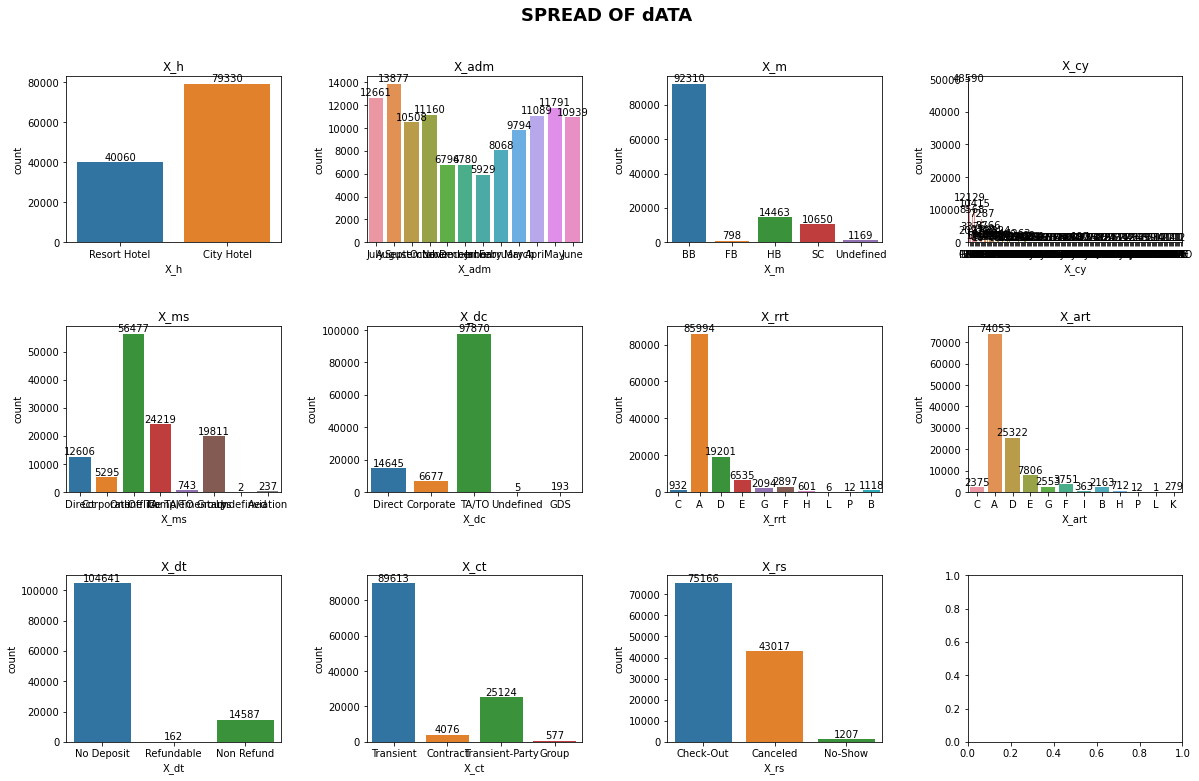

In [41]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[20,16])
fig.suptitle('SPREAD OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cat_cols):
	a = fig.add_subplot(4,4, i+1)
	a=sns.countplot(x = df[col] , ax=a)
	a.bar_label(a.containers[0])
	a.set_title(col )
	a.set_xlabel(col )

### Observation
1. X_h: City Hotel has around 80000 bookings whereas Resort Hotel has 40000 bookings in the dataset.
2. X_adm: The Month of arrival with the most bookings are July, August and September.
3. X_m: Type of meal booked most is bed & breakfast.
4. X_cy: Customers of Portugal Country has booked the most around 92000.

Finally, let's look at the count plot for each categorical column:

In accordance with previous observations, the majority of the data are City Hotel
Most customers make hotel bookings for the months July and August (summer)
Most customers are from international customers
Most customers choose to book at hotels with the No Deposit type
Most market segments or distribution channels come from Travel Agents
Most selected room types are A
Column country has many unique values
From the reservation_status column, it can be seen that the proportion of data is balanced between canceled and not hotel bookings
Column reservation_status_date has many values because it is date data
For other columns it looks dominated by certain values


## Cancellations

### Let's look at distribution of hotel bookings and separate them by their cancellation status

In [42]:
import pandas as pd
from scipy.stats import contingency
from scipy.stats import fisher_exact

In [43]:
df_clean["X_h"].value_counts()

City Hotel      79326
Resort Hotel    40059
Name: X_h, dtype: int64

In [44]:
# Create a contingency table with two binary variables: is_canceled and hotel
contingency_table = pd.crosstab(df_clean['Y_c'], df['X_h'])
contingency_table

X_h,City Hotel,Resort Hotel
Y_c,,
0,46228,28937
1,33098,11122


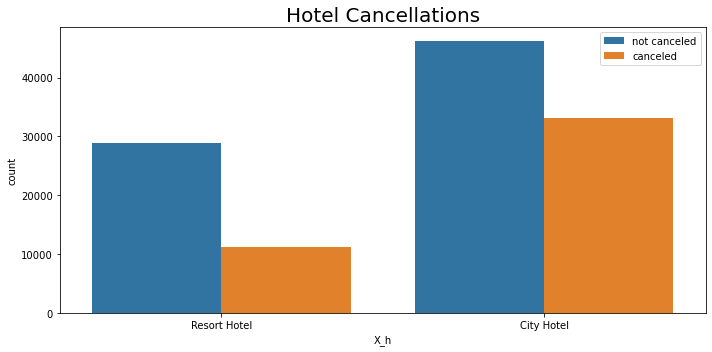

In [45]:
# a plot of the number of instances for each hotel according to cancellations
plt.figure(figsize=(10,5))
sns.countplot(x=df_clean["X_h"], hue=df["Y_c"])
plt.title("Hotel Cancellations", size=20)
plt.legend(["not canceled", "canceled"])
plt.tight_layout()
plt.show()

### Odds Ratio Hotel Canellation

In [46]:
df_city_hotel = df_clean[df_clean.X_h=='City Hotel']
df_city_hotel

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_ad.1,X_m,X_cy,...,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd,X_ts,X_tg,X_k,X_gl
40060,City Hotel,0,6,2015,July,27,1,1,HB,PRT,...,Transient,0.00,0,0,Check-Out,2015-07-03,2,1,0,Local
40061,City Hotel,1,88,2015,July,27,1,2,BB,PRT,...,Transient,76.50,0,1,Canceled,2015-07-01,4,1,0,Local
40062,City Hotel,1,65,2015,July,27,1,1,BB,PRT,...,Transient,68.00,0,1,Canceled,2015-04-30,4,1,0,Local
40063,City Hotel,1,92,2015,July,27,1,2,BB,PRT,...,Transient,76.50,0,2,Canceled,2015-06-23,6,1,0,Local
40064,City Hotel,1,100,2015,July,27,2,2,BB,PRT,...,Transient,76.50,0,1,Canceled,2015-04-02,2,2,0,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,BB,BEL,...,Transient,96.14,0,0,Check-Out,2017-09-06,7,30,0,International
119386,City Hotel,0,102,2017,August,35,31,3,BB,FRA,...,Transient,225.43,0,2,Check-Out,2017-09-07,7,31,0,International
119387,City Hotel,0,34,2017,August,35,31,2,BB,DEU,...,Transient,157.71,0,4,Check-Out,2017-09-07,7,31,0,International
119388,City Hotel,0,109,2017,August,35,31,2,BB,GBR,...,Transient,104.40,0,0,Check-Out,2017-09-07,7,31,0,International


In [47]:
# Calculate the odds ratio for City Hotel
city_hotel_table = contingency_table.loc[:, 'City Hotel']
city_hotel_odds_ratio, p_value = fisher_exact([city_hotel_table.values, contingency_table.sum(axis=1).values])

In [48]:
df_resort_hotel = df_clean[df_clean.X_h=='Resort Hotel']
df_resort_hotel

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_ad.1,X_m,X_cy,...,X_ct,X_adr,X_rcp,X_tsr,X_rs,X_rsd,X_ts,X_tg,X_k,X_gl
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,1,0,Local
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,1,0,Local
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,0,International
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,Transient,75.00,0,0,Check-Out,2015-07-02,1,1,0,International
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,Transient,98.00,0,1,Check-Out,2015-07-03,2,1,0,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,BB,GBR,...,Transient,89.75,0,0,Check-Out,2017-09-10,10,32,1,International
40056,Resort Hotel,0,169,2017,August,35,30,2,BB,IRL,...,Transient-Party,202.27,0,1,Check-Out,2017-09-10,11,30,0,International
40057,Resort Hotel,0,204,2017,August,35,29,2,BB,IRL,...,Transient,153.57,0,3,Check-Out,2017-09-12,14,29,0,International
40058,Resort Hotel,0,211,2017,August,35,31,2,HB,GBR,...,Contract,112.80,0,1,Check-Out,2017-09-14,14,31,0,International


In [49]:
# Calculate the odds ratio for Resort Hotel
resort_hotel_table = contingency_table.loc[:, 'Resort Hotel']
resort_hotel_odds_ratio, p_value = fisher_exact([resort_hotel_table.values, contingency_table.sum(axis=1).values])

In [50]:
# Print the odds ratio and p-value for each hotel type
print('Odds ratio and p-value for City Hotel:')
print('Odds ratio: {:.2f}'.format(city_hotel_odds_ratio))
print('p-value: {:.4f}'.format(p_value))
print()
print('Odds ratio and p-value for Resort Hotel:')
print('Odds ratio: {:.2f}'.format(resort_hotel_odds_ratio))
print('p-value: {:.4f}'.format(p_value))

Odds ratio and p-value for City Hotel:
Odds ratio: 0.82
p-value: 0.0000

Odds ratio and p-value for Resort Hotel:
Odds ratio: 1.53
p-value: 0.0000


In [51]:
city_hotel_odds_ratio / resort_hotel_odds_ratio

0.5368250082302206

#### Odds ratio is a measure of association between two binary variables. It is the ratio of the odds of an event occurring in one group to the odds of it occurring in another group. The odds ratio is commonly used in logistic regression to quantify the strength of the association between a set of independent variables and a binary outcome. 
#### An odds ratio of 1 indicates no association between exposure and outcome, while an odds ratio greater than 1 indicates a positive association and an odds ratio less than 1 indicates a negative association.  

In [52]:
# group by cancellations
is_canceled = df_clean.groupby(by="Y_c")

In [53]:
# get groups according to binary outcome
canceled = is_canceled.get_group(1)
not_canceled = is_canceled.get_group(0)

In [54]:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

resort_canceled_percent = []
city_canceled_percent = []

# divide cancellation outcome by hotel and month of arrival
resort_1 = canceled[canceled["X_h"]=="Resort Hotel"]["X_adm"].value_counts()
resort_0 = not_canceled[not_canceled["X_h"]=="Resort Hotel"]["X_adm"].value_counts()
city_1 = canceled[canceled["X_h"]=="City Hotel"]["X_adm"].value_counts()
city_0 = not_canceled[not_canceled["X_h"]=="City Hotel"]["X_adm"].value_counts()

# calculate cancellation percentage according to hotel
for i in ordered_months:
    resort_canceled_percent.append(round((resort_1[i] / (resort_0[i]+resort_1[i]))*100,2))
    city_canceled_percent.append(round((city_1[i]/(city_0[i]+city_1[i]))*100,2))

# create a DataFrame with the cancellation percentage of each hotel
df_resort_cancel = pd.DataFrame(resort_canceled_percent, index=ordered_months, columns=["Resort Hotel Canceled %"])
df_city_cancel = pd.DataFrame(city_canceled_percent, index=ordered_months, columns=["City Hotel Canceled %"])

# join DataFrames
df_hotel_cancel = df_resort_cancel.join(df_city_cancel)
df_hotel_cancel

,Resort Hotel Canceled %,City Hotel Canceled %
January,14.82,39.67
February,25.62,38.29
March,22.88,36.95
April,29.34,46.32
May,28.77,44.38
June,33.07,44.69
July,31.40,40.88
August,33.45,40.07
September,32.37,42.03
October,27.51,42.97


### Observations:
1. There are more instances for City Hotel than Resort Hotel in the data.
2. The odds ratio is 0.5367
3. City Hotel has a higher cancellation rate according to arrival months.

### Cancellations According to Market Segment

In [55]:
cancelled_data = df_clean[df_clean['X_rs'] == 'Canceled']

In [56]:
df_clean["X_ms"].value_counts()

Online TA        56476
Offline TA/TO    24219
Groups           19810
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: X_ms, dtype: int64

In [57]:
contingency_table = pd.crosstab(df_clean['X_ms'], df['Y_c'], margins = True, margins_name = 'Total')
contingency_table

Y_c,0,1,Total
X_ms,,,
Aviation,185,52,237
Complementary,646,97,743
Corporate,4303,992,5295
Direct,10672,1933,12605
Groups,7713,12097,19810
Offline TA/TO,15908,8311,24219
Online TA,35738,20738,56476
Total,75165,44220,119385


In [58]:
contingency_table = pd.crosstab(df_clean['X_ms'], df['Y_c'], margins = True, margins_name = 'Total', normalize = True)
contingency_table

Y_c,0,1,Total
X_ms,,,
Aviation,0.001550,0.000436,0.001985
Complementary,0.005411,0.000812,0.006224
Corporate,0.036043,0.008309,0.044352
Direct,0.089391,0.016191,0.105583
Groups,0.064606,0.101328,0.165934
Offline TA/TO,0.133250,0.069615,0.202865
Online TA,0.299351,0.173707,0.473058
Total,0.629602,0.370398,1.000000


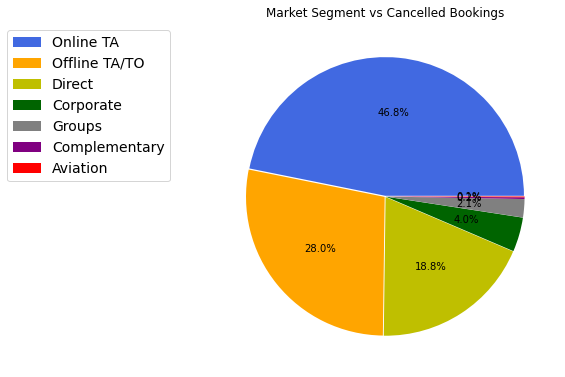

In [59]:
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['X_ms'].unique())
colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['X_ms'].value_counts(),
       autopct = '%.1f%%',
       explode = explode,
       colors = colors)
plt.legend(cancelled_data['X_ms'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

### Observation
#### About 65% of the cancelled bookings are by travel agents or tour operators

## Bivariate Analysis

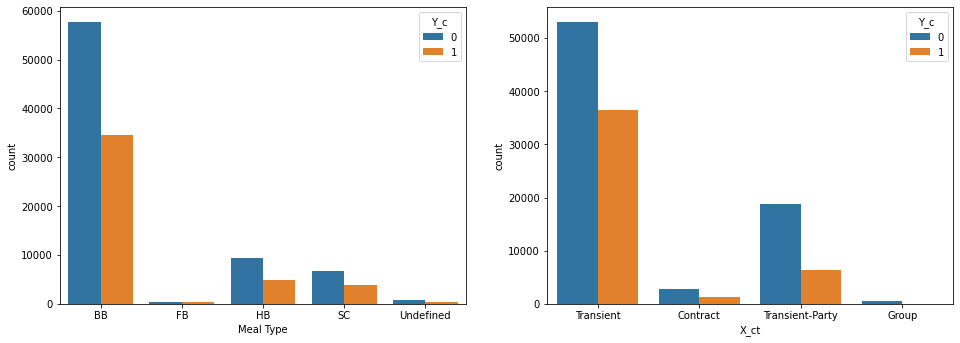

In [60]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.countplot(df_clean['X_m'], hue=df_clean['Y_c'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(df_clean['X_ct'], hue=df_clean['Y_c'])
#plt.xlabel('Customer Type')
#plt.subplot(223)
#sns.countplot(data['reserved_room_type'], hue=data['is_canceled'])
#plt.xlabel('Reserved Room Type')
#plt.subplot(224)
#sns.countplot(data['reservation_status'], hue=data['is_canceled'])
#plt.xlabel('Reservation Status')
plt.show()

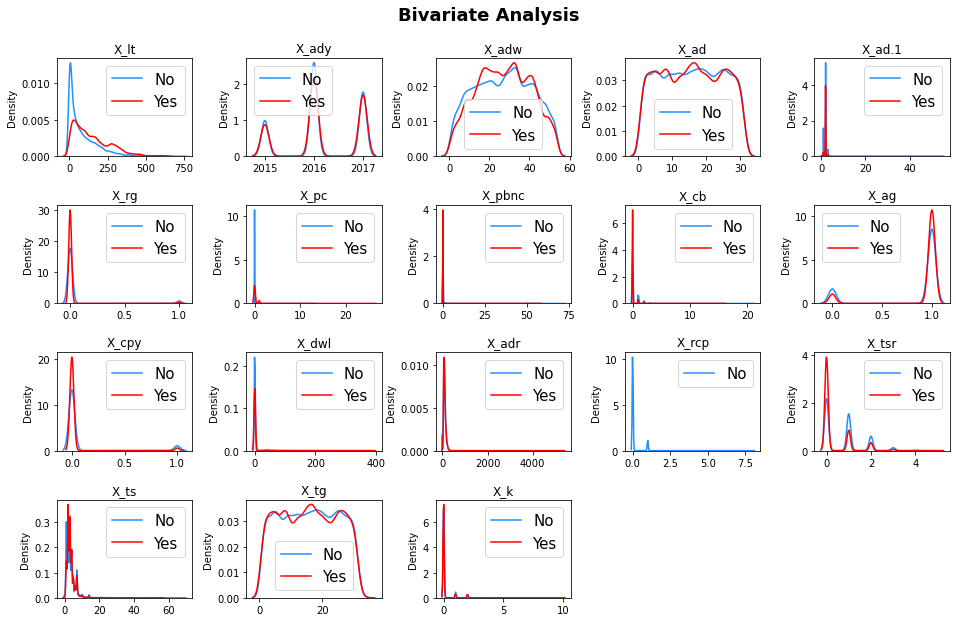

In [61]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_cols):
    a = fig.add_subplot(5,5 , i+1)
    
    sns.distplot(x =df_clean[df_clean['Y_c']==0][col],  color='dodgerblue' , ax=a ,  hist =False )
    sns.distplot(x =df_clean[df_clean['Y_c']==1][col],  color='red' , ax=a , hist =False ) 
    a.set_title(col)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15) 

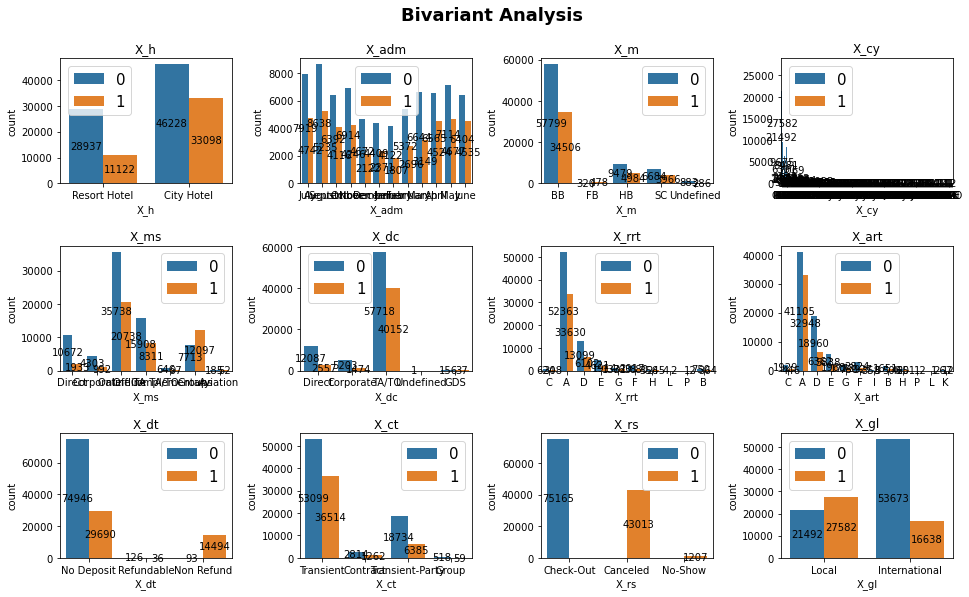

In [62]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(cat_cols):
    a = fig.add_subplot(4, 4, i+1)
    a=sns.countplot(x = df_clean[col] , ax=a , hue = df_clean['Y_c'] )
    a.set_title(col)
    a.bar_label(a.containers[0] , label_type='center') 
    a.bar_label(a.containers[1] , label_type='center')
    a.legend(fontsize=15)

### Reformatting Feature

#### Change value for  X_pc (previous cancellations) to 0 and 1.

#### 0 -> no previous cancellations
#### 1 -> previous cancellations > 0

In [63]:
df_clean['X_pc'] = df_clean['X_pc'].apply(lambda x: 0 if x == 0 else 1)
df_clean['X_pc'].value_counts()

0    112901
1      6484
Name: X_pc, dtype: int64

#### Change value for  X_cb (change in booking) to 0 and 1.

#### 0 -> no booking changes
#### 1 -> booking changes > 0

In [64]:
df_clean['X_cb'] = df_clean['X_cb'].apply(lambda x: 0 if x == 0 else 1)
df_clean['X_cb'].value_counts() 

0    101310
1     18075
Name: X_cb, dtype: int64

In [65]:
df_clean.shape

(119385, 32)

### Normalization

In [66]:
from sklearn.preprocessing import MinMaxScaler

df_clean['lead_time_norm'] = MinMaxScaler().fit_transform(df_clean['X_lt'].values.reshape(len(df_clean), 1))
df_clean['adr_norm'] = MinMaxScaler().fit_transform(df_clean['X_adr'].values.reshape(len(df_clean), 1))
df_clean['required_car_parking_spaces_norm'] = MinMaxScaler().fit_transform(df_clean['X_rcp'].values.reshape(len(df_clean), 1))
df_clean['total_of_special_requests_norm'] = MinMaxScaler().fit_transform(df_clean['X_tsr'].values.reshape(len(df_clean), 1))
df_clean['total_stays_norm'] = MinMaxScaler().fit_transform(df_clean['X_ts'].values.reshape(len(df_clean), 1))
df_clean['total_guests_norm'] = MinMaxScaler().fit_transform(df_clean['X_tg'].values.reshape(len(df_clean), 1))

In [67]:
df_clean

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_ad.1,X_m,X_cy,...,X_ts,X_tg,X_k,X_gl,lead_time_norm,adr_norm,required_car_parking_spaces_norm,total_of_special_requests_norm,total_stays_norm,total_guests_norm
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,0,1,0,Local,0.464043,0.000000,0.0,0.0,0.000000,0.000000
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,0,1,0,Local,1.000000,0.000000,0.0,0.0,0.000000,0.000000
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,1,1,0,International,0.009498,0.013889,0.0,0.0,0.014493,0.000000
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,1,1,0,International,0.017639,0.013889,0.0,0.0,0.014493,0.000000
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,2,1,0,International,0.018996,0.018148,0.0,0.2,0.028986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,BB,BEL,...,7,30,0,International,0.031208,0.017804,0.0,0.0,0.101449,0.878788
119386,City Hotel,0,102,2017,August,35,31,3,BB,FRA,...,7,31,0,International,0.138399,0.041746,0.0,0.4,0.101449,0.909091
119387,City Hotel,0,34,2017,August,35,31,2,BB,DEU,...,7,31,0,International,0.046133,0.029206,0.0,0.8,0.101449,0.909091
119388,City Hotel,0,109,2017,August,35,31,2,BB,GBR,...,7,31,0,International,0.147897,0.019333,0.0,0.0,0.101449,0.909091


In [68]:
cat_cols

Index(['X_h', 'X_adm', 'X_m', 'X_cy', 'X_ms', 'X_dc', 'X_rrt', 'X_art', 'X_dt',
       'X_ct', 'X_rs', 'X_gl'],
      dtype='object')

### Feature Encoding
#### we need to do the encoding for the categorical columns that will be used for modeling using One Hot Encoding

In [69]:
encode_cat = ['X_h',
 'X_m',
 'X_ms',
 'X_dc',
 'X_dt',
 'X_ct',
 'X_gl']

In [70]:
for cat in encode_cat:
    onehots = pd.get_dummies(df_clean[cat], prefix=cat)
    df_clean = df_clean.join(onehots)

In [71]:
df_clean.columns = df_clean.columns.str.replace(' ', '')

In [72]:
df_clean.columns = df_clean.columns.str.replace('/', '')

In [73]:
df_clean

,X_h,Y_c,X_lt,X_ady,X_adm,X_adw,X_ad,X_ad.1,X_m,X_cy,...,X_dc_Undefined,X_dt_NoDeposit,X_dt_NonRefund,X_dt_Refundable,X_ct_Contract,X_ct_Group,X_ct_Transient,X_ct_Transient-Party,X_gl_International,X_gl_Local
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,0,1,0,0,0,0,1,0,0,1
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,0,1,0,0,0,0,1,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,0,1,0,0,0,0,1,0,1,0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,0,1,0,0,0,0,1,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,BB,BEL,...,0,1,0,0,0,0,1,0,1,0
119386,City Hotel,0,102,2017,August,35,31,3,BB,FRA,...,0,1,0,0,0,0,1,0,1,0
119387,City Hotel,0,34,2017,August,35,31,2,BB,DEU,...,0,1,0,0,0,0,1,0,1,0
119388,City Hotel,0,109,2017,August,35,31,2,BB,GBR,...,0,1,0,0,0,0,1,0,1,0


In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119385 entries, 0 to 119389
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   X_h                               119385 non-null  object        
 1   Y_c                               119385 non-null  int64         
 2   X_lt                              119385 non-null  int64         
 3   X_ady                             119385 non-null  int64         
 4   X_adm                             119385 non-null  object        
 5   X_adw                             119385 non-null  int64         
 6   X_ad                              119385 non-null  int64         
 7   X_ad.1                            119385 non-null  int64         
 8   X_m                               119385 non-null  object        
 9   X_cy                              119385 non-null  object        
 10  X_ms                            

### Setup Train Test Data

In [75]:
# Split Feature and Label
X = df_clean[['X_rg', 'X_pc', 'X_cb','X_ag', 'X_cpy', 'lead_time_norm', 'adr_norm',
       'required_car_parking_spaces_norm', 'total_of_special_requests_norm',
       'total_stays_norm', 'total_guests_norm', 
       'X_h_CityHotel', 'X_h_ResortHotel', 'X_m_BB', 'X_m_FB', 'X_m_HB', 'X_m_SC',
       'X_m_Undefined', 'X_ms_Aviation',
       'X_ms_Complementary', 'X_ms_Corporate',
       'X_ms_Direct', 'X_ms_Groups',
       'X_ms_OfflineTATO', 'X_ms_OnlineTA',
       'X_dc_Corporate', 'X_dc_Direct',
       'X_dc_GDS', 'X_dc_TATO',
       'X_dc_Undefined',
       'X_dt_NoDeposit', 'X_dt_NonRefund',
       'X_dt_Refundable', 'X_ct_Contract',
       'X_ct_Group', 'X_ct_Transient',
       'X_ct_Transient-Party', 'X_gl_International',
       'X_gl_Local']]

y = df_clean['Y_c'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

def show_feature_importance(model):
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  ax = feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('feature')
  plt.title('feature importance score')

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

### Logistic Regression Evaluation

In [78]:
eval_classification(lr_model, y_pred_lr, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.81
Recall (Test Set): 0.61
F1-Score (Test Set): 0.69
AUC: 0.76


In [79]:
print('Train score: ' + str(lr_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(lr_model.score(X_test, y_test))) #accuracy

Train score: 0.8048797999258098
Test score:0.7999497431315613


In [80]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(X_train, y_train)

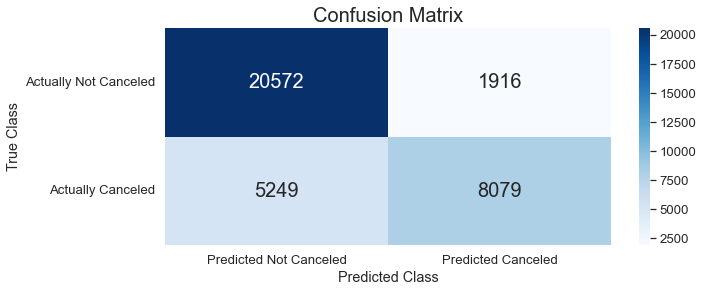

In [81]:
show_cmatrix(y_test, y_pred_lr)

### Features selection using Backward Elemination 

In [104]:
import statsmodels.api as smf  

In [105]:
#X = np.append(arr = np.ones((119385,1)).astype(int), values=X, axis=1)  
X = pd.concat([pd.Series(1, index=X.index, name='constant'), X], axis=1)

In [108]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

         Current function value: 0.423708
         Iterations: 35


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119354
Method:                           MLE   Df Model:                           30
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3572
Time:                        12:14:13   Log-Likelihood:                -50584.
converged:                      False   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
constant                             1.8713        nan        nan        nan         nan         nan
X_pc                                 3.3450      0.062     53.732      0.000       3.223       3.467
X_cb                                -0.8274      0.025    -33.550      0.000      -0.876      -0.779
X_ag                                -0.0521      0.042     -1.244      0.214      -0.134       0.030
X_cpy                               -1.2467      0.078    -16.019      0.000      -1.399      -1.094
lead_time_norm                       3.0126      0.068     44.507      0.000       2.880       3.145
adr_norm                            28.5867      0.977     29.261      0.000      26.672      30.502
required_car_parking_spaces_norm  -149.6938   1645.332     -0.091      0.928   -3374.484    3075.097
total_of_special_requests_norm      -3.6951      0.057    -64.419      0.000      -3.808      -3.583
total_stays_norm                     3.8060      0.217     17.572      0.000       3.381       4.231
total_guests_norm                    0.0185      0.029      0.640      0.522      -0.038       0.075
X_h_CityHotel                        0.8953   1.17e+06   7.67e-07      1.000   -2.29e+06    2.29e+06
X_h_ResortHotel                      0.9759   1.19e+06   8.22e-07      1.000   -2.33e+06    2.33e+06
X_m_BB                               0.3361   3.79e+05   8.86e-07      1.000   -7.44e+05    7.44e+05
X_m_FB                               1.0469   3.78e+05   2.77e-06      1.000   -7.41e+05    7.41e+05
X_m_HB                               0.2014   3.79e+05   5.32e-07      1.000   -7.42e+05    7.42e+05
X_m_SC                               0.4807    3.8e+05   1.26e-06      1.000   -7.45e+05    7.45e+05
X_m_Undefined                       -0.1938   3.81e+05  -5.09e-07      1.000   -7.46e+05    7.46e+05
X_ms_Aviation                        0.4521      0.191      2.368      0.018       0.078       0.826
X_ms_Complementary                   0.5662      0.137      4.138      0.000       0.298       0.834
X_ms_Corporate                      -0.2353      0.092     -2.567      0.010      -0.415      -0.056
X_ms_Direct                         -0.1380      0.080     -1.733      0.083      -0.294       0.018
X_ms_OfflineTATO                    -0.6386      0.037    -17.124      0.000      -0.712      -0.565
X_ms_OnlineTA                        0.7511      0.040     18.693      0.000       0.672       0.830
X_dc_Corporate                       0.7392   1.58e+06   4.69e-07      1.000   -3.09e+06    3.09e+06
X_dc_Direct                          0.0714   1.58e+06   4.53e-08      1.000   -3.09e+06    3.09e+06
X_dc_GDS                            -0.6479   1.58e+06  -4.11e-07      1.000   -3.09e+06    3.09e+06
X_dc_TATO                            0.3783   1.58e+06    2.4e-07      1.000   -3.09e+06    3.09e+06
X_dc_Undefined                       1.3303   1.58e+06   8.43e-07      1.000   -3.09e+06    3.09e+06
X_dt_NoDe

### Observation
#### We have 33 dependent variables

### Elemination 1

In [110]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

         Current function value: 0.423708
         Iterations: 35


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119354
Method:                           MLE   Df Model:                           30
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3572
Time:                        12:17:32   Log-Likelihood:                -50584.
converged:                      False   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
constant                             2.5110        nan        nan        nan         nan         nan
X_pc                                 3.3450      0.062     53.732      0.000       3.223       3.467
X_cb                                -0.8274      0.025    -33.550      0.000      -0.876      -0.779
X_ag                                -0.0521      0.042     -1.244      0.214      -0.134       0.030
X_cpy                               -1.2467      0.078    -16.019      0.000      -1.399      -1.094
lead_time_norm                       3.0126      0.068     44.507      0.000       2.880       3.145
adr_norm                            28.5867      0.977     29.261      0.000      26.672      30.502
required_car_parking_spaces_norm  -149.6710   1642.987     -0.091      0.927   -3369.866    3070.524
total_of_special_requests_norm      -3.6951      0.057    -64.419      0.000      -3.808      -3.583
total_stays_norm                     3.8060      0.217     17.572      0.000       3.381       4.231
total_guests_norm                    0.0185      0.029      0.640      0.522      -0.038       0.075
X_h_ResortHotel                      0.0806      0.019      4.271      0.000       0.044       0.118
X_m_BB                               0.4640   9.38e+05   4.95e-07      1.000   -1.84e+06    1.84e+06
X_m_FB                               1.1749   9.43e+05   1.25e-06      1.000   -1.85e+06    1.85e+06
X_m_HB                               0.3294    9.5e+05   3.47e-07      1.000   -1.86e+06    1.86e+06
X_m_SC                               0.6086   9.37e+05    6.5e-07      1.000   -1.84e+06    1.84e+06
X_m_Undefined                       -0.0659   9.47e+05  -6.96e-08      1.000   -1.86e+06    1.86e+06
X_ms_Aviation                        0.4521      0.191      2.368      0.018       0.078       0.826
X_ms_Complementary                   0.5662      0.137      4.138      0.000       0.298       0.834
X_ms_Corporate                      -0.2353      0.092     -2.567      0.010      -0.415      -0.056
X_ms_Direct                         -0.1380      0.080     -1.733      0.083      -0.294       0.018
X_ms_OfflineTATO                    -0.6386      0.037    -17.124      0.000      -0.712      -0.565
X_ms_OnlineTA                        0.7511      0.040     18.693      0.000       0.672       0.830
X_dc_Corporate                       0.8669        nan        nan        nan         nan         nan
X_dc_Direct                          0.1990        nan        nan        nan         nan         nan
X_dc_GDS                            -0.5203        nan        nan        nan         nan         nan
X_dc_TATO                            0.5059        nan        nan        nan         nan         nan
X_dc_Undefined                       1.4595        nan        nan        nan         nan         nan
X_dt_NoDeposit                      -5.5181      0.108    -51.249      0.000      -5.729      -5.307
X_dt_Refu

### Observation
#### Removed X_h_CityHotel dependent variable (13)
#### As it has p-value = 1

### Elemination 2

In [112]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

         Current function value: 0.423708
         Iterations: 35


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119354
Method:                           MLE   Df Model:                           30
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3572
Time:                        12:20:09   Log-Likelihood:                -50584.
converged:                      False   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
constant                             2.8979        nan        nan        nan         nan         nan
X_pc                                 3.3450      0.062     53.732      0.000       3.223       3.467
X_cb                                -0.8274      0.025    -33.550      0.000      -0.876      -0.779
X_ag                                -0.0521      0.042     -1.244      0.214      -0.134       0.030
X_cpy                               -1.2467      0.078    -16.019      0.000      -1.399      -1.094
lead_time_norm                       3.0126      0.068     44.507      0.000       2.880       3.145
adr_norm                            28.5867      0.977     29.261      0.000      26.672      30.502
required_car_parking_spaces_norm  -149.6846   1644.382     -0.091      0.927   -3372.615    3073.246
total_of_special_requests_norm      -3.6951      0.057    -64.419      0.000      -3.808      -3.583
total_stays_norm                     3.8060      0.217     17.572      0.000       3.381       4.231
total_guests_norm                    0.0185      0.029      0.640      0.522      -0.038       0.075
X_h_ResortHotel                      0.0806      0.019      4.271      0.000       0.044       0.118
X_m_FB                               0.7108      0.107      6.624      0.000       0.500       0.921
X_m_HB                              -0.1347      0.027     -4.970      0.000      -0.188      -0.082
X_m_SC                               0.1446      0.025      5.770      0.000       0.095       0.194
X_m_Undefined                       -0.5299      0.100     -5.274      0.000      -0.727      -0.333
X_ms_Aviation                        0.4521      0.191      2.368      0.018       0.078       0.826
X_ms_Complementary                   0.5662      0.137      4.138      0.000       0.298       0.834
X_ms_Corporate                      -0.2353      0.092     -2.567      0.010      -0.415      -0.056
X_ms_Direct                         -0.1380      0.080     -1.733      0.083      -0.294       0.018
X_ms_OfflineTATO                    -0.6386      0.037    -17.124      0.000      -0.712      -0.565
X_ms_OnlineTA                        0.7511      0.040     18.693      0.000       0.672       0.830
X_dc_Corporate                       0.9440        nan        nan        nan         nan         nan
X_dc_Direct                          0.2762        nan        nan        nan         nan         nan
X_dc_GDS                            -0.4431        nan        nan        nan         nan         nan
X_dc_TATO                            0.5831        nan        nan        nan         nan         nan
X_dc_Undefined                       1.5377        nan        nan        nan         nan         nan
X_dt_NoDeposit                      -5.5181      0.108    -51.249      0.000      -5.729      -5.307
X_dt_Refundable                     -4.9169      0.249    -19.724      0.000      -5.406      -4.428
X_ct_Cont

### Observation
#### Removed X_m_BB dependent variable (15)
#### As it has p-value = 1

### Elemination 3

In [115]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441495
         Iterations 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119355
Method:                           MLE   Df Model:                           29
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3302
Time:                        12:22:34   Log-Likelihood:                -52708.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                          -3.5117   5.78e+05  -6.07e-06      1.000   -1.13e+06    1.13e+06
X_pc                               3.2574      0.059     55.086      0.000       3.141       3.373
X_cb                              -0.8584      0.024    -35.349      0.000      -0.906      -0.811
X_ag                              -0.0515      0.041     -1.254      0.210      -0.132       0.029
X_cpy                             -1.3177      0.077    -17.076      0.000      -1.469      -1.166
lead_time_norm                     3.1248      0.067     46.869      0.000       2.994       3.256
adr_norm                          24.3921      0.945     25.821      0.000      22.541      26.244
total_of_special_requests_norm    -3.7281      0.056    -66.004      0.000      -3.839      -3.617
total_stays_norm                   4.4922      0.214     21.037      0.000       4.074       4.911
total_guests_norm                  0.0135      0.028      0.475      0.635      -0.042       0.069
X_h_ResortHotel                   -0.1229      0.018     -6.721      0.000      -0.159      -0.087
X_m_FB                             0.7232      0.103      6.989      0.000       0.520       0.926
X_m_HB                            -0.1096      0.026     -4.140      0.000      -0.161      -0.058
X_m_SC                             0.1570      0.025      6.308      0.000       0.108       0.206
X_m_Undefined                     -0.4024      0.100     -4.038      0.000      -0.598      -0.207
X_ms_Aviation                      0.4777      0.190      2.518      0.012       0.106       0.850
X_ms_Complementary                 0.4674      0.135      3.471      0.001       0.203       0.731
X_ms_Corporate                    -0.2733      0.091     -3.013      0.003      -0.451      -0.096
X_ms_Direct                       -0.2796      0.078     -3.582      0.000      -0.433      -0.127
X_ms_OfflineTATO                  -0.6497      0.037    -17.504      0.000      -0.722      -0.577
X_ms_OnlineTA                      0.7045      0.040     17.688      0.000       0.626       0.783
X_dc_Corporate                     7.4199   5.78e+05   1.28e-05      1.000   -1.13e+06    1.13e+06
X_dc_Direct                        6.7829   5.78e+05   1.17e-05      1.000   -1.13e+06    1.13e+06
X_dc_GDS                           6.1029   5.78e+05   1.06e-05      1.000   -1.13e+06    1.13e+06
X_dc_TATO                          7.0615   5.78e+05   1.22e-05      1.000   -1.13e+06    1.13e+06
X_dc_Undefined                   -30.8789   5.53e+08  -5.58e-08      1.000   -1.08e+09    1.08e+09
X_dt_NoDeposit                    -5.5279      0.107    -51.611      0.000      -5.738      -5.318
X_dt_Refundable                   -4.8917      0.246    -19.920      0.000      -5.373      -4.410
X_ct_Contract                     -0.4740      0.058     -8.168      0.000      -0.588      -0.360
X_ct_Group                        -0.5448      0.153     -3.554      0.00

### Observation
#### Removed required_car_parking_spaces_norm dependent variable (9)
#### As it has p-value = 1

### Elemination 4

In [116]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

         Current function value: 0.441495
         Iterations: 35


C:\Users\manis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119355
Method:                           MLE   Df Model:                           29
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3302
Time:                        12:24:23   Log-Likelihood:                -52708.
converged:                      False   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           3.9082      0.134     29.105      0.000       3.645       4.171
X_pc                               3.2574      0.059     55.086      0.000       3.141       3.373
X_cb                              -0.8584      0.024    -35.349      0.000      -0.906      -0.811
X_ag                              -0.0515      0.041     -1.254      0.210      -0.132       0.029
X_cpy                             -1.3177      0.077    -17.076      0.000      -1.469      -1.166
lead_time_norm                     3.1248      0.067     46.869      0.000       2.994       3.256
adr_norm                          24.3921      0.945     25.821      0.000      22.541      26.244
total_of_special_requests_norm    -3.7281      0.056    -66.004      0.000      -3.839      -3.617
total_stays_norm                   4.4922      0.214     21.037      0.000       4.074       4.911
total_guests_norm                  0.0135      0.028      0.475      0.635      -0.042       0.069
X_h_ResortHotel                   -0.1229      0.018     -6.721      0.000      -0.159      -0.087
X_m_FB                             0.7232      0.103      6.989      0.000       0.520       0.926
X_m_HB                            -0.1096      0.026     -4.140      0.000      -0.161      -0.058
X_m_SC                             0.1570      0.025      6.308      0.000       0.108       0.206
X_m_Undefined                     -0.4024      0.100     -4.038      0.000      -0.598      -0.207
X_ms_Aviation                      0.4777      0.190      2.518      0.012       0.106       0.850
X_ms_Complementary                 0.4674      0.135      3.471      0.001       0.203       0.731
X_ms_Corporate                    -0.2733      0.091     -3.013      0.003      -0.451      -0.096
X_ms_Direct                       -0.2796      0.078     -3.582      0.000      -0.433      -0.127
X_ms_OfflineTATO                  -0.6497      0.037    -17.504      0.000      -0.722      -0.577
X_ms_OnlineTA                      0.7045      0.040     17.688      0.000       0.626       0.783
X_dc_Direct                       -0.6370      0.095     -6.740      0.000      -0.822      -0.452
X_dc_GDS                          -1.3171      0.205     -6.435      0.000      -1.718      -0.916
X_dc_TATO                         -0.3584      0.079     -4.558      0.000      -0.513      -0.204
X_dc_Undefined                   -17.3343   1.55e+04     -0.001      0.999   -3.04e+04    3.04e+04
X_dt_NoDeposit                    -5.5279      0.107    -51.611      0.000      -5.738      -5.318
X_dt_Refundable                   -4.8917      0.246    -19.920      0.000      -5.373      -4.410
X_ct_Contract                     -0.4740      0.058     -8.168      0.000      -0.588      -0.360
X_ct_Group                        -0.5448      0.153     -3.554      0.000      -0.845      -0.244
X_ct_Transient                     0.3859      0.028     13.971      0.00

### Observation
#### Removed X_dc_Corporate dependent variable (27)
#### As it has p-value = 1

### Elemination 5

In [117]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441496
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119356
Method:                           MLE   Df Model:                           28
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3302
Time:                        12:26:41   Log-Likelihood:                -52708.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           3.9076      0.134     29.102      0.000       3.644       4.171
X_pc                               3.2574      0.059     55.086      0.000       3.142       3.373
X_cb                              -0.8584      0.024    -35.348      0.000      -0.906      -0.811
X_ag                              -0.0514      0.041     -1.251      0.211      -0.132       0.029
X_cpy                             -1.3175      0.077    -17.073      0.000      -1.469      -1.166
lead_time_norm                     3.1248      0.067     46.869      0.000       2.994       3.255
adr_norm                          24.3929      0.945     25.822      0.000      22.541      26.244
total_of_special_requests_norm    -3.7282      0.056    -66.007      0.000      -3.839      -3.618
total_stays_norm                   4.4921      0.214     21.037      0.000       4.074       4.911
total_guests_norm                  0.0135      0.028      0.476      0.634      -0.042       0.069
X_h_ResortHotel                   -0.1229      0.018     -6.721      0.000      -0.159      -0.087
X_m_FB                             0.7231      0.103      6.989      0.000       0.520       0.926
X_m_HB                            -0.1097      0.026     -4.144      0.000      -0.162      -0.058
X_m_SC                             0.1570      0.025      6.308      0.000       0.108       0.206
X_m_Undefined                     -0.4025      0.100     -4.039      0.000      -0.598      -0.207
X_ms_Aviation                      0.4781      0.190      2.521      0.012       0.106       0.850
X_ms_Complementary                 0.4671      0.135      3.469      0.001       0.203       0.731
X_ms_Corporate                    -0.2729      0.091     -3.009      0.003      -0.451      -0.095
X_ms_Direct                       -0.2802      0.078     -3.590      0.000      -0.433      -0.127
X_ms_OfflineTATO                  -0.6497      0.037    -17.504      0.000      -0.722      -0.577
X_ms_OnlineTA                      0.7045      0.040     17.687      0.000       0.626       0.783
X_dc_Direct                       -0.6359      0.094     -6.732      0.000      -0.821      -0.451
X_dc_GDS                          -1.3165      0.205     -6.433      0.000      -1.718      -0.915
X_dc_TATO                         -0.3579      0.079     -4.551      0.000      -0.512      -0.204
X_dt_NoDeposit                    -5.5279      0.107    -51.611      0.000      -5.738      -5.318
X_dt_Refundable                   -4.8920      0.246    -19.922      0.000      -5.373      -4.411
X_ct_Contract                     -0.4740      0.058     -8.168      0.000      -0.588      -0.360
X_ct_Group                        -0.5448      0.153     -3.553      0.000      -0.845      -0.244
X_ct_Transient                     0.3859      0.028     13.971      0.000       0.332       0.440
=========================================================================

### Observation
#### Removed X_dc_Undefined dependent variable (31)
#### As it has p-value = 0.999

### Elemination 6

In [118]:
x_opt = X.iloc[:, [0, 3, 4, 5, 6, 7, 8, 10, 11, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441497
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119357
Method:                           MLE   Df Model:                           27
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3302
Time:                        12:30:36   Log-Likelihood:                -52708.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           3.9128      0.134     29.243      0.000       3.651       4.175
X_pc                               3.2573      0.059     55.082      0.000       3.141       3.373
X_cb                              -0.8583      0.024    -35.345      0.000      -0.906      -0.811
X_ag                              -0.0516      0.041     -1.256      0.209      -0.132       0.029
X_cpy                             -1.3176      0.077    -17.075      0.000      -1.469      -1.166
lead_time_norm                     3.1255      0.067     46.890      0.000       2.995       3.256
adr_norm                          24.4109      0.944     25.861      0.000      22.561      26.261
total_of_special_requests_norm    -3.7282      0.056    -66.007      0.000      -3.839      -3.618
total_stays_norm                   4.4889      0.213     21.033      0.000       4.071       4.907
X_h_ResortHotel                   -0.1228      0.018     -6.715      0.000      -0.159      -0.087
X_m_FB                             0.7233      0.103      6.992      0.000       0.521       0.926
X_m_HB                            -0.1099      0.026     -4.152      0.000      -0.162      -0.058
X_m_SC                             0.1569      0.025      6.303      0.000       0.108       0.206
X_m_Undefined                     -0.4023      0.100     -4.037      0.000      -0.598      -0.207
X_ms_Aviation                      0.4783      0.190      2.522      0.012       0.107       0.850
X_ms_Complementary                 0.4668      0.135      3.466      0.001       0.203       0.731
X_ms_Corporate                    -0.2726      0.091     -3.006      0.003      -0.450      -0.095
X_ms_Direct                       -0.2805      0.078     -3.595      0.000      -0.434      -0.128
X_ms_OfflineTATO                  -0.6499      0.037    -17.511      0.000      -0.723      -0.577
X_ms_OnlineTA                      0.7042      0.040     17.682      0.000       0.626       0.782
X_dc_Direct                       -0.6353      0.094     -6.727      0.000      -0.820      -0.450
X_dc_GDS                          -1.3160      0.205     -6.430      0.000      -1.717      -0.915
X_dc_TATO                         -0.3573      0.079     -4.545      0.000      -0.511      -0.203
X_dt_NoDeposit                    -5.5275      0.107    -51.609      0.000      -5.737      -5.318
X_dt_Refundable                   -4.8902      0.246    -19.911      0.000      -5.372      -4.409
X_ct_Contract                     -0.4741      0.058     -8.170      0.000      -0.588      -0.360
X_ct_Group                        -0.5447      0.153     -3.553      0.000      -0.845      -0.244
X_ct_Transient                     0.3860      0.028     13.976      0.000       0.332       0.440
==================================================================================================
"""

### Observation
#### Removed total_guests_norm dependent variable (12)
#### As it has p-value = 0.634

### Elemination 7

In [119]:
x_opt = X.iloc[:, [0, 3, 4, 6, 7, 8, 10, 11, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 32, 34, 35, 36, 37]]
logit_model = sm.Logit(endog=y, exog=x_opt).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441504
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Y_c   No. Observations:               119385
Model:                          Logit   Df Residuals:                   119358
Method:                           MLE   Df Model:                           26
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.3302
Time:                        12:33:23   Log-Likelihood:                -52709.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
constant                           3.8916      0.133     29.306      0.000       3.631       4.152
X_pc                               3.2585      0.059     55.097      0.000       3.143       3.374
X_cb                              -0.8582      0.024    -35.345      0.000      -0.906      -0.811
X_cpy                             -1.2862      0.073    -17.615      0.000      -1.429      -1.143
lead_time_norm                     3.1185      0.066     46.954      0.000       2.988       3.249
adr_norm                          24.3622      0.943     25.831      0.000      22.514      26.211
total_of_special_requests_norm    -3.7267      0.056    -65.999      0.000      -3.837      -3.616
total_stays_norm                   4.4731      0.213     20.996      0.000       4.056       4.891
X_h_ResortHotel                   -0.1211      0.018     -6.643      0.000      -0.157      -0.085
X_m_FB                             0.7205      0.103      6.968      0.000       0.518       0.923
X_m_HB                            -0.1099      0.026     -4.153      0.000      -0.162      -0.058
X_m_SC                             0.1570      0.025      6.310      0.000       0.108       0.206
X_m_Undefined                     -0.4000      0.100     -4.014      0.000      -0.595      -0.205
X_ms_Aviation                      0.4719      0.190      2.487      0.013       0.100       0.844
X_ms_Complementary                 0.4744      0.135      3.524      0.000       0.211       0.738
X_ms_Corporate                    -0.2797      0.091     -3.089      0.002      -0.457      -0.102
X_ms_Direct                       -0.2850      0.078     -3.646      0.000      -0.438      -0.132
X_ms_OfflineTATO                  -0.6542      0.037    -17.703      0.000      -0.727      -0.582
X_ms_OnlineTA                      0.6996      0.040     17.643      0.000       0.622       0.777
X_dc_Direct                       -0.6332      0.095     -6.695      0.000      -0.819      -0.448
X_dc_GDS                          -1.3353      0.204     -6.543      0.000      -1.735      -0.935
X_dc_TATO                         -0.3765      0.077     -4.882      0.000      -0.528      -0.225
X_dt_NoDeposit                    -5.5316      0.107    -51.667      0.000      -5.741      -5.322
X_dt_Refundable                   -4.8925      0.246    -19.907      0.000      -5.374      -4.411
X_ct_Contract                     -0.4746      0.058     -8.178      0.000      -0.588      -0.361
X_ct_Group                        -0.5445      0.153     -3.551      0.000      -0.845      -0.244
X_ct_Transient                     0.3858      0.028     13.968      0.000       0.332       0.440
==================================================================================================
"""

### Observation
#### Removed X_ag dependent variable (5)
#### As it has p-value = 0.209

#### Now remaining dependent variables has p- value less than 0.05. So, these features will be taken for modelling.

### Final Features

In [120]:
x_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119385 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   constant                        119385 non-null  int64  
 1   X_pc                            119385 non-null  int64  
 2   X_cb                            119385 non-null  int64  
 3   X_cpy                           119385 non-null  int64  
 4   lead_time_norm                  119385 non-null  float64
 5   adr_norm                        119385 non-null  float64
 6   total_of_special_requests_norm  119385 non-null  float64
 7   total_stays_norm                119385 non-null  float64
 8   X_h_ResortHotel                 119385 non-null  uint8  
 9   X_m_FB                          119385 non-null  uint8  
 10  X_m_HB                          119385 non-null  uint8  
 11  X_m_SC                          119385 non-null  uint8  
 12  X_m_Undefined   

### Setup Train Test Data

In [121]:
# Split Feature and Label
X = x_opt

y = df_clean['Y_c'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Modelling
## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


### Logistic Regression Evaluation

In [123]:
eval_classification(lr_model, y_pred_lr, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.84
Recall (Test Set): 0.57
F1-Score (Test Set): 0.68
AUC: 0.75


In [124]:
print('Train score: ' + str(lr_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(lr_model.score(X_test, y_test))) #accuracy

Train score: 0.8037310485945746
Test score:0.8007594371230735


In [125]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(X_train, y_train)

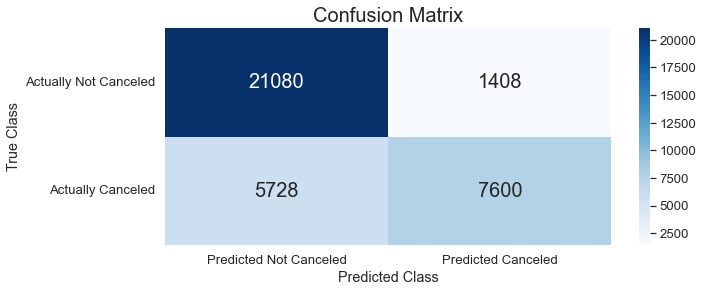

In [126]:
show_cmatrix(y_test, y_pred_lr)

### Observation
#### On comparison of Logistic Model in which features selection has been done on basis of p-value with the previous Logistic Model shows that we have improved the prediction and overfitting has been reduced to negligible. 
#### Confusion matrix shows the improvement in True class vs Predicted class.

## K-Nearest Neighbor

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

### K-Nearest Neighbor Evaluation

In [128]:
eval_classification(knn_model, y_pred_knn, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.79
Recall (Test Set): 0.69
F1-Score (Test Set): 0.74
AUC: 0.79


In [129]:
print('Train score: ' + str(knn_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(knn_model.score(X_test, y_test))) #accuracy

Train score: 0.8689107204824755
Test score:0.8165624301987938


In [130]:
recall_knn = recall_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = knn_model.score(X_train, y_train)

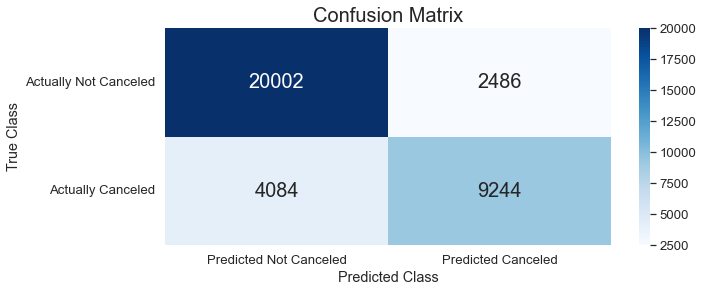

In [131]:
show_cmatrix(y_test, y_pred_knn)

## Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)

### Decision Tree Evaluation

In [133]:
eval_classification(dt_model, y_pred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.73
Recall (Test Set): 0.73
F1-Score (Test Set): 0.73
AUC: 0.79


In [134]:
print('Train score: ' + str(dt_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt_model.score(X_test, y_test))) #accuracy

Train score: 0.9862269501848772
Test score:0.7999497431315613


### Observation 
#### Overfit

In [135]:
recall_dt = recall_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
acc_dt_train = dt_model.score(X_train, y_train)

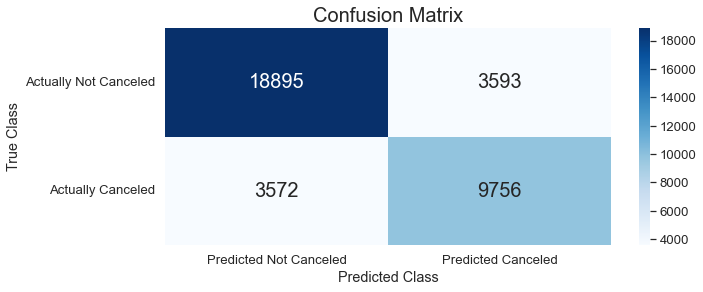

In [136]:
show_cmatrix(y_test, y_pred_dt)

## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

### Random Forest Evaluation

In [138]:
eval_classification(rf_model, y_pred_rf, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.73
F1-Score (Test Set): 0.77
AUC: 0.82


In [139]:
print('Train score: ' + str(rf_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf_model.score(X_test, y_test))) #accuracy

Train score: 0.986191051705776
Test score:0.8384800089345544


### Observation 
#### Overfit

In [140]:
recall_rf = recall_score(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
acc_rf_train = rf_model.score(X_train, y_train)

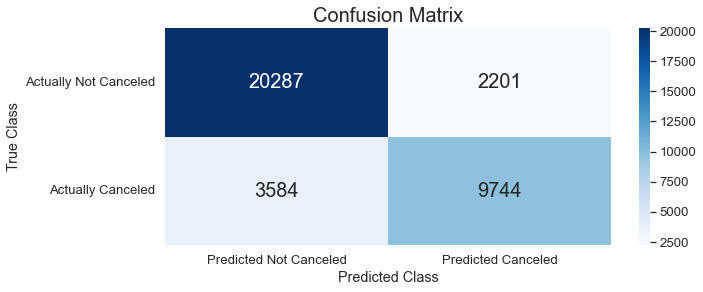

In [141]:
show_cmatrix(y_test, y_pred_rf)

## XGBoost

In [142]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(verbosity = 0)

xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

### XGBoost Evaluation

In [144]:
eval_classification(xg_model, y_pred_xg, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.85
Recall (Test Set): 0.67
F1-Score (Test Set): 0.75
AUC: 0.80


In [145]:
print('Train score: ' + str(xg_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg_model.score(X_test, y_test))) #accuracy

Train score: 0.8438296497505056
Test score:0.8309693991512174


In [146]:
recall_xg = recall_score(y_test, y_pred_xg)
acc_xg = accuracy_score(y_test, y_pred_xg)
precision_xg = precision_score(y_test, y_pred_xg)
f1_xg = f1_score(y_test, y_pred_xg)
acc_xg_train = xg_model.score(X_train, y_train)

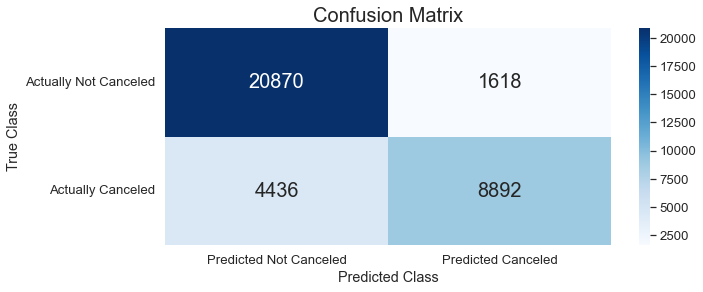

In [147]:
show_cmatrix(y_test, y_pred_xg)

### Evaluation Summary

In [148]:
evaluation_summary = {
    'Logistic Regression': [acc_lr, recall_lr, precision_lr, f1_lr],
    'KNN':[acc_knn, recall_knn, precision_knn, f1_knn],
    'Decision Tree':[acc_dt, recall_dt, precision_dt, f1_dt],
    'Random Forest':[acc_rf, recall_rf, precision_rf, f1_rf],
    'XGBoost':[acc_xg, recall_xg, precision_xg, f1_xg]
}

eva_sum = pd.DataFrame(data = evaluation_summary, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum

,Logistic Regression,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.800759,0.816562,0.799950,0.838480,0.830969
Recall,0.570228,0.693577,0.731993,0.731092,0.667167
Precision,0.843694,0.788065,0.730841,0.815739,0.846051
F1 Score,0.680516,0.737808,0.731417,0.771100,0.746036


In [149]:
evaluation_sum_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_dt_train, acc_rf_train, acc_xg_train],
    "Test": [acc_lr, acc_knn, acc_dt, acc_rf, acc_xg]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_sum_train_test, index = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'])
eva_sum_train_test

,Train,Test
Logistic Regression,0.803731,0.800759
KNN,0.868911,0.816562
Decision Tree,0.986227,0.799950
Random Forest,0.986191,0.838480
XGBoost,0.843830,0.830969


### Summary:

#### From the evaluation results of modeling with default parameters, it is found that the best is in the XGBoost model, with an accuracy of 83%. This model is neither overfit nor underfit

#### For Random Forest has the best performance. However, the model is still in the overfit category

# Tuned Models

## Decision Tree 

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

dt_tuned = DecisionTreeClassifier()
dt_tuned_model = RandomizedSearchCV(dt_tuned, hyperparameters, cv=5, scoring='accuracy')
dt_tuned_model.fit(X_train, y_train)

y_pred_dt_tuned = dt_tuned_model.predict(X_test)

### Decision Tree Evaluation

In [151]:
show_best_hyperparameter(dt_tuned_model.best_estimator_, hyperparameters)

Best max_depth: 106
Best min_samples_split: 10
Best min_samples_leaf: 2
Best max_features: sqrt


In [152]:
eval_classification(dt_tuned_model, y_pred_dt_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.83
Recall (Test Set): 0.55
F1-Score (Test Set): 0.66
AUC: 0.74


In [153]:
print('Train score: ' + str(dt_tuned_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt_tuned_model.score(X_test, y_test))) #accuracy

Train score: 0.8199451949885723
Test score:0.7905963815054724


In [154]:
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned)
acc_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned)
acc_dt_tuned_train = dt_tuned_model.score(X_train, y_train)

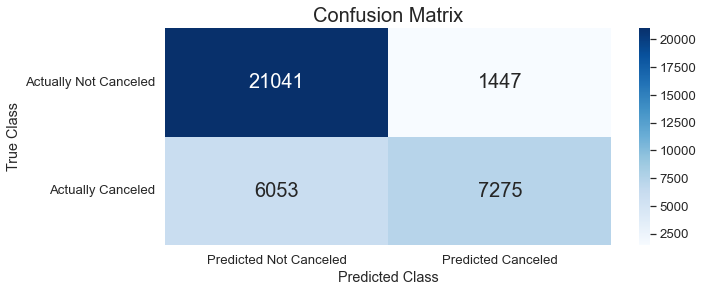

In [156]:
show_cmatrix(y_test, y_pred_dt_tuned)

### Observation
#### Tuned Decision Model has removed overfitting problem with the accuracy of 80%.

## Random Forest 

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], #
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], 
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1],
                      )

rf_tuned = RandomForestClassifier()
rf_tuned_model = RandomizedSearchCV(rf_tuned, hyperparameters, cv=5, scoring='accuracy')
rf_tuned_model.fit(X_train,y_train)

y_pred_rf_tuned = rf_tuned_model.predict(X_test)

### Random Forest Tuned Evaluation

In [158]:
show_best_hyperparameter(rf_tuned_model.best_estimator_, hyperparameters)

Best n_estimators: 300
Best bootstrap: True
Best criterion: gini
Best max_depth: 40
Best min_samples_split: 8
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [159]:
eval_classification(rf_tuned_model, y_pred_rf_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.84
Recall (Test Set): 0.71
F1-Score (Test Set): 0.77
AUC: 0.82


In [160]:
print('Train score: ' + str(rf_tuned_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf_tuned_model.score(X_test, y_test))) #accuracy

Train score: 0.9292081992126267
Test score:0.8428635246817066


In [161]:
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
acc_rf_tuned_train = rf_tuned_model.score(X_train, y_train)

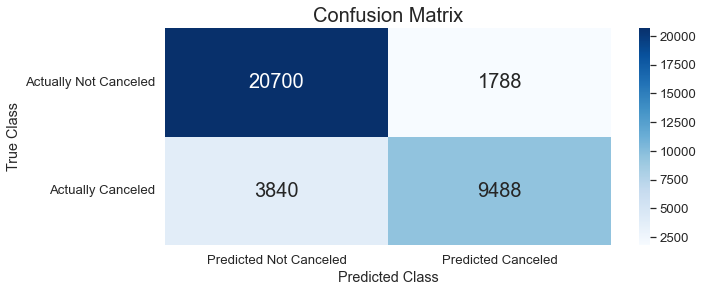

In [162]:
show_cmatrix(y_test, y_pred_rf_tuned)

## XGBoost 

In [164]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [165]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg_tuned = XGBClassifier()
xg_tuned_model = RandomizedSearchCV(xg_tuned, hyperparameters, cv=5, scoring='accuracy')
xg_tuned_model.fit(X_train,y_train)

y_pred_xg_tuned = xg_tuned_model.predict(X_test)

### XGBoost Tuned Evaluation

In [166]:
show_best_hyperparameter(xg_tuned_model.best_estimator_, hyperparameters)

Best max_depth: 100
Best min_child_weight: 10
Best gamma: 0.30000000000000004
Best tree_method: auto
Best colsample_bytree: 0.9
Best eta: 0.30303030303030304
Best lambda: 0.5
Best alpha: 0.2


In [167]:
eval_classification(xg_tuned_model, y_pred_xg_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.82
Recall (Test Set): 0.73
F1-Score (Test Set): 0.77
AUC: 0.82


In [168]:
print('Train score: ' + str(xg_tuned_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg_tuned_model.score(X_test, y_test))) #accuracy

Train score: 0.9457932965573359
Test score:0.8400714764351128


In [169]:
recall_xg_tuned = recall_score(y_test, y_pred_xg_tuned)
acc_xg_tuned = accuracy_score(y_test, y_pred_xg_tuned)
precision_xg_tuned = precision_score(y_test, y_pred_xg_tuned)
f1_xg_tuned = f1_score(y_test, y_pred_xg_tuned)
acc_xg_tuned_train = xg_tuned_model.score(X_train, y_train)

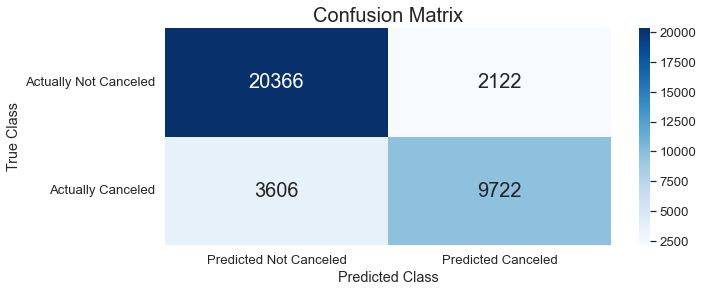

In [170]:
show_cmatrix(y_test, y_pred_xg_tuned)

### Tuned Models Evaluation Summary 

In [171]:
evaluation_summary_tuned = {
    'Decision Tree Tuned':[acc_dt_tuned, recall_dt_tuned, precision_dt_tuned, f1_dt_tuned],
    'Random Forest Tuned':[acc_rf_tuned, recall_rf_tuned, precision_rf_tuned, f1_rf_tuned],
    'XGBoost Tuned':[acc_xg_tuned, recall_xg_tuned, precision_xg_tuned, f1_xg_tuned]
}

eva_sum_tuned = pd.DataFrame(data = evaluation_summary_tuned, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum_tuned

,Decision Tree Tuned,Random Forest Tuned,XGBoost Tuned
Accuracy,0.790596,0.842864,0.840071
Recall,0.545843,0.711885,0.729442
Precision,0.834098,0.841433,0.820838
F1 Score,0.659864,0.771257,0.772446


In [175]:
evaluation_sum_tuned_train_test = {
    "Train" : [acc_dt_tuned_train, acc_rf_tuned_train, acc_xg_tuned_train],
    "Test": [acc_dt_tuned, acc_rf_tuned, acc_xg_tuned]
}

eva_sum_tuned_train_test = pd.DataFrame(data = evaluation_sum_tuned_train_test, index = ['Decision Tree Tuned', 'Random Forest Tuned', 'XGBoost Tuned'])
eva_sum_tuned_train_test

,Train,Test
Decision Tree Tuned,0.819945,0.790596
Random Forest Tuned,0.929208,0.842864
XGBoost Tuned,0.945793,0.840071


### Observation
#### From the tuning results, it can be seen that there is an increase in accuracy, but the majority have overfit conditions.
#### Only Decision Tree model's overfitting condition have been removed but it has less accuracy
#### So, the XGBoost model in the previous stage is still selected

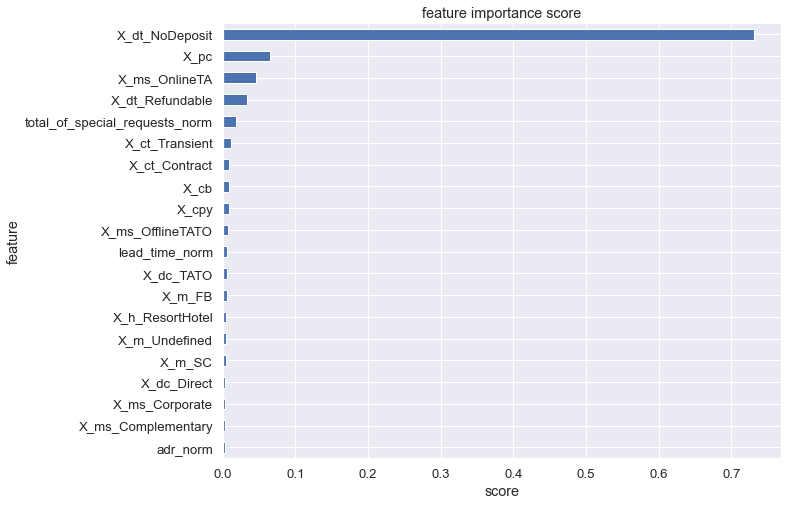

In [176]:
show_feature_importance(xg_model)

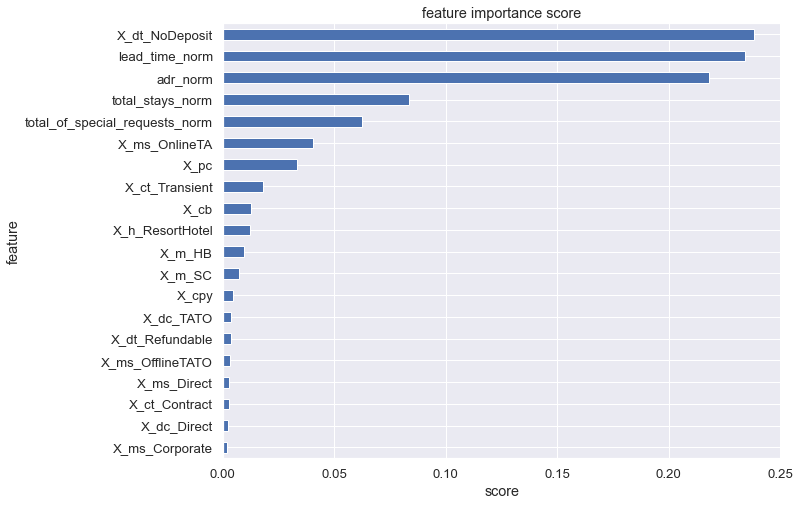

In [183]:
show_feature_importance(dt_model)

In [180]:
#correlations matrix
corr_matrix = df_clean.corr()

In [182]:
#All attributes correlation with is_canceled feature
corr_matrix["Y_c"].sort_values(ascending=False)

Y_c                                 1.000000
X_dt_NonRefund                      0.481487
X_gl_Local                          0.331556
lead_time_norm                      0.293184
X_lt                                0.293184
X_pc                                0.270961
X_ms_Groups                         0.221906
X_dc_TATO                           0.176046
X_h_CityHotel                       0.136498
X_ct_Transient                      0.133161
X_ag                                0.102125
X_ad.1                              0.059992
X_dwl                               0.054192
adr_norm                            0.047609
X_adr                               0.047609
X_m_FB                              0.038832
total_stays_norm                    0.017804
X_ts                                0.017804
X_ady                               0.016740
X_m_BB                              0.013104
X_adw                               0.008124
X_m_SC                              0.001294
X_dc_Undef

In [235]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [225]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=20,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [226]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 15s 5ms/step - loss: 0.4884 - accuracy: 0.7739 - val_loss: 0.4383 - val_accuracy: 0.8010
Epoch 2/100
2612/2612 [==============================] - 11s 4ms/step - loss: 0.4457 - accuracy: 0.7999 - val_loss: 0.4326 - val_accuracy: 0.8007
Epoch 3/100
2612/2612 [==============================] - 11s 4ms/step - loss: 0.4413 - accuracy: 0.8019 - val_loss: 0.4296 - val_accuracy: 0.8064
Epoch 4/100
2612/2612 [==============================] - 17s 7ms/step - loss: 0.4379 - accuracy: 0.8024 - val_loss: 0.4263 - val_accuracy: 0.8074
Epoch 5/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4358 - accuracy: 0.8012 - val_loss: 0.4258 - val_accuracy: 0.8038
Epoch 6/100
2612/2612 [==============================] - 17s 7ms/step - loss: 0.4337 - accuracy: 0.8037 - val_loss: 0.4242 - val_accuracy: 0.8091
Epoch 7/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4337 - accuracy: 0.8015 - val_loss: 0.4226 -

In [227]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 3s 3ms/step - loss: 0.4078 - accuracy: 0.8130
Accuracy of model is 0.8130444288253784


In [202]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [203]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 14s 5ms/step - loss: 0.5019 - accuracy: 0.7646 - val_loss: 0.4404 - val_accuracy: 0.7967
Epoch 2/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4560 - accuracy: 0.7941 - val_loss: 0.4337 - val_accuracy: 0.8024
Epoch 3/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4456 - accuracy: 0.7992 - val_loss: 0.4284 - val_accuracy: 0.8042
Epoch 4/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4423 - accuracy: 0.7995 - val_loss: 0.4301 - val_accuracy: 0.8022
Epoch 5/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4400 - accuracy: 0.8015 - val_loss: 0.4251 - val_accuracy: 0.8106
Epoch 6/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4377 - accuracy: 0.8008 - val_loss: 0.4223 - val_accuracy: 0.8107
Epoch 7/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4347 - accuracy: 0.8023 - val_loss: 0.4193 -

In [206]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 3s 3ms/step - loss: 0.4148 - accuracy: 0.8114
Accuracy of model is 0.8113692402839661


In [207]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=20,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [208]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4761 - accuracy: 0.7804 - val_loss: 0.4359 - val_accuracy: 0.8045
Epoch 2/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4419 - accuracy: 0.8025 - val_loss: 0.4315 - val_accuracy: 0.8079
Epoch 3/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4362 - accuracy: 0.8035 - val_loss: 0.4266 - val_accuracy: 0.8060
Epoch 4/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4320 - accuracy: 0.8050 - val_loss: 0.4228 - val_accuracy: 0.8084
Epoch 5/100
2612/2612 [==============================] - 12s 4ms/step - loss: 0.4287 - accuracy: 0.8060 - val_loss: 0.4208 - val_accuracy: 0.8069
Epoch 6/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4267 - accuracy: 0.8065 - val_loss: 0.4213 - val_accuracy: 0.8001
Epoch 7/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4248 - accuracy: 0.8061 - val_loss: 0.4172 -

In [209]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 2s 2ms/step - loss: 0.4067 - accuracy: 0.8149
Accuracy of model is 0.8148592710494995


In [229]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=80,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=20,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [230]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 13s 5ms/step - loss: 0.4682 - accuracy: 0.7860 - val_loss: 0.4343 - val_accuracy: 0.8046
Epoch 2/100
2612/2612 [==============================] - 12s 5ms/step - loss: 0.4375 - accuracy: 0.8034 - val_loss: 0.4283 - val_accuracy: 0.8035
Epoch 3/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4318 - accuracy: 0.8041 - val_loss: 0.4239 - val_accuracy: 0.8053
Epoch 4/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4284 - accuracy: 0.8047 - val_loss: 0.4205 - val_accuracy: 0.8082
Epoch 5/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4243 - accuracy: 0.8065 - val_loss: 0.4183 - val_accuracy: 0.8075
Epoch 6/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4222 - accuracy: 0.8078 - val_loss: 0.4157 - val_accuracy: 0.8109
Epoch 7/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4204 - accuracy: 0.8087 - val_loss: 0.4166 - val_

In [231]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 2s 2ms/step - loss: 0.4052 - accuracy: 0.8153
Accuracy of model is 0.8152781128883362


## Tuned ANN Model

In [232]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(neurons=100, dropout=0.5):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {'neurons': [50, 100, 150],
              'dropout': [0.3, 0.5, 0.7]}

# Create the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search object to the data
grid_result = grid.fit(X_train, y_train)

In [233]:
# Print the best parameters and score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

Best parameters: {'dropout': 0.3, 'neurons': 150}
Best score: 0.8186648289362589


In [213]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=20,activation='relu'))
#model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [214]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 11s 3ms/step - loss: 0.4627 - accuracy: 0.7889 - val_loss: 0.4327 - val_accuracy: 0.8036
Epoch 2/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4344 - accuracy: 0.8028 - val_loss: 0.4273 - val_accuracy: 0.8025
Epoch 3/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4294 - accuracy: 0.8049 - val_loss: 0.4249 - val_accuracy: 0.7980
Epoch 4/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4248 - accuracy: 0.8059 - val_loss: 0.4210 - val_accuracy: 0.8076
Epoch 5/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4223 - accuracy: 0.8073 - val_loss: 0.4158 - val_accuracy: 0.8095
Epoch 6/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4196 - accuracy: 0.8085 - val_loss: 0.4150 - val_accuracy: 0.8069
Epoch 7/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4181 - accuracy: 0.8097 - val_loss: 0.4131 - val_a

2612/2612 [==============================] - 8s 3ms/step - loss: 0.4060 - accuracy: 0.8150 - val_loss: 0.4024 - val_accuracy: 0.8156
Epoch 58/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4063 - accuracy: 0.8148 - val_loss: 0.4019 - val_accuracy: 0.8168
Epoch 58: early stopping


In [215]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 2s 2ms/step - loss: 0.4019 - accuracy: 0.8168
Accuracy of model is 0.81675785779953


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(neurons=100, dropout=0.5):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {'neurons': [50, 100, 150],
              'dropout': [0.3, 0.5, 0.7]}

# Create the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search object to the data
grid_result = grid.fit(X_train, y_train)

In [216]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [217]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 10s 3ms/step - loss: 0.4795 - accuracy: 0.7795 - val_loss: 0.4423 - val_accuracy: 0.7859
Epoch 2/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4420 - accuracy: 0.7987 - val_loss: 0.4268 - val_accuracy: 0.8075
Epoch 3/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4356 - accuracy: 0.8026 - val_loss: 0.4257 - val_accuracy: 0.8018
Epoch 4/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4307 - accuracy: 0.8027 - val_loss: 0.4182 - val_accuracy: 0.8096
Epoch 5/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4293 - accuracy: 0.8034 - val_loss: 0.4156 - val_accuracy: 0.8100
Epoch 6/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4266 - accuracy: 0.8054 - val_loss: 0.4145 - val_accuracy: 0.8104
Epoch 7/100
2612/2612 [==============================] - 8s 3ms/step - loss: 0.4258 - accuracy: 0.8066 - val_loss: 0.4132 - val_a

In [218]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 2s 2ms/step - loss: 0.4068 - accuracy: 0.8144
Accuracy of model is 0.8144404888153076


In [219]:
model = Sequential()

#adding dropout layers for improved learning
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=80,activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(units=10,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [220]:
#Putting early_stop in to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop]
          )


Epoch 1/100
2612/2612 [==============================] - 11s 4ms/step - loss: 0.4630 - accuracy: 0.7866 - val_loss: 0.4334 - val_accuracy: 0.7950
Epoch 2/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4345 - accuracy: 0.8032 - val_loss: 0.4235 - val_accuracy: 0.8038
Epoch 3/100
2612/2612 [==============================] - 10s 4ms/step - loss: 0.4289 - accuracy: 0.8052 - val_loss: 0.4171 - val_accuracy: 0.8108
Epoch 4/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4249 - accuracy: 0.8066 - val_loss: 0.4152 - val_accuracy: 0.8084
Epoch 5/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4226 - accuracy: 0.8078 - val_loss: 0.4124 - val_accuracy: 0.8106
Epoch 6/100
2612/2612 [==============================] - 9s 3ms/step - loss: 0.4204 - accuracy: 0.8086 - val_loss: 0.4123 - val_accuracy: 0.8125
Epoch 7/100
2612/2612 [==============================] - 9s 4ms/step - loss: 0.4197 - accuracy: 0.8092 - val_loss: 0.4119 - val_

In [228]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')

1120/1120 [==============================] - 3s 3ms/step - loss: 0.4078 - accuracy: 0.8130
Accuracy of model is 0.8130444288253784


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(neurons=100, dropout=0.5):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {'neurons': [50, 100, 150],
              'dropout': [0.3, 0.5, 0.7]}

# Create the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search object to the data
grid_result = grid.fit(X_train, y_train)